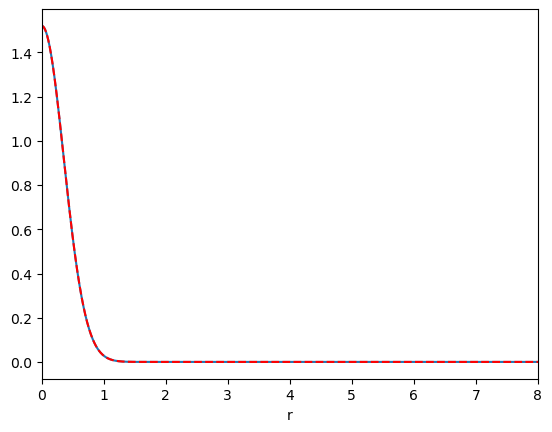

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 50                                                   # Truncation ordem

L0 = 1                                             # Map parameter 

col = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # collocation points (Verificado)
                               
colr = col[1:N+2]                                                         # physical domain (Verificado)             

r1 = L0 * colr/(np.sqrt(1-colr**2)) 
r = np.flip(r1)                                           # physical domain (Verificado)  

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     

# Base function



psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi (Scalar field)                                    

r0 = 0

sigma = 1/2

# L0 = 1 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

#A0 =  0.76  #  0.7602785  -> disperse ;  # 0.77 -> colapse 

# L0 = 3 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

#A0 =  0.75981136951800  #  0.759811369518  -> disperse ;  # 0.759811369518001   -> colapse 

Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = A0*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()


In [2]:
r

array([6.12323400e-17, 3.08096710e-02, 6.16778888e-02, 9.26636462e-02,
       1.23826835e-01, 1.55228713e-01, 1.86932397e-01, 2.19003380e-01,
       2.51510096e-01, 2.84524531e-01, 3.18122901e-01, 3.52386404e-01,
       3.87402064e-01, 4.23263696e-01, 4.60073002e-01, 4.97940834e-01,
       5.36988659e-01, 5.77350269e-01, 6.19173786e-01, 6.62624031e-01,
       7.07885343e-01, 7.55164946e-01, 8.04697006e-01, 8.56747548e-01,
       9.11620453e-01, 9.69664834e-01, 1.03128418e+00, 1.09694775e+00,
       1.16720497e+00, 1.24270377e+00, 1.32421401e+00, 1.41265815e+00,
       1.50915142e+00, 1.61505545e+00, 1.73205081e+00, 1.86223672e+00,
       2.00827073e+00, 2.17356810e+00, 2.36259336e+00, 2.58129755e+00,
       2.83779394e+00, 3.14343920e+00, 3.51463544e+00, 3.97598354e+00,
       4.56613958e+00, 5.34952751e+00, 6.44210712e+00, 8.07579391e+00,
       1.07917187e+01, 1.62132657e+01, 3.24573411e+01])

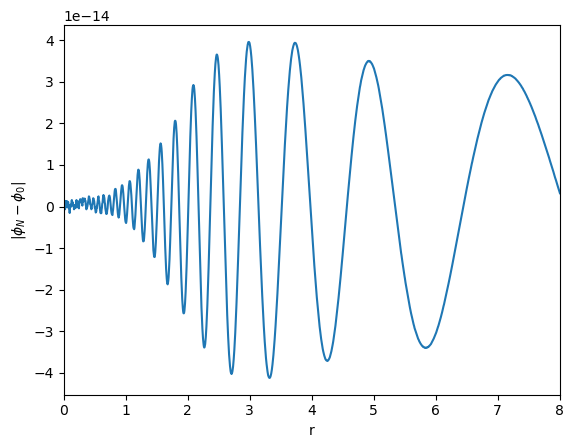

In [3]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [4]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr

tol = 1e-19
#cnew = 0 
#err = abs(c0 - cnew)

n = 0
nf = 100

# Newton Raphson loop
#while max(err) >= tol:
while n <= nf:
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1]  
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
  print(max(err))
  if  max(err) <= tol:
    print(c0)
    break
  n = n + 1


0.12509105939986637
0.008216326329573809
2.1988402954364883e-05
1.222109913268099e-10
5.551115123125783e-17
4.7704895589362195e-18
1.0408340855860843e-17
6.938893903907228e-18
2.7755575615628914e-17
5.551115123125783e-17
4.336808689942018e-18
2.7755575615628914e-17
3.469446951953614e-18
3.469446951953614e-18
3.469446951953614e-18
1.734723475976807e-18
2.7755575615628914e-17
2.7755575615628914e-17
3.469446951953614e-18
3.469446951953614e-18
2.2768245622195593e-18
3.903127820947816e-18
2.7755575615628914e-17
6.938893903907228e-18
3.469446951953614e-18
3.469446951953614e-18
5.551115123125783e-17
2.7755575615628914e-17
1.6263032587282567e-18
2.7755575615628914e-17
5.551115123125783e-17
2.7755575615628914e-17
6.938893903907228e-18
3.469446951953614e-18
3.469446951953614e-18
1.0408340855860843e-17
1.3877787807814457e-17
1.3877787807814457e-17
1.0408340855860843e-17
3.469446951953614e-18
2.7755575615628914e-17
3.469446951953614e-18
5.551115123125783e-17
2.7755575615628914e-17
2.77555756156289

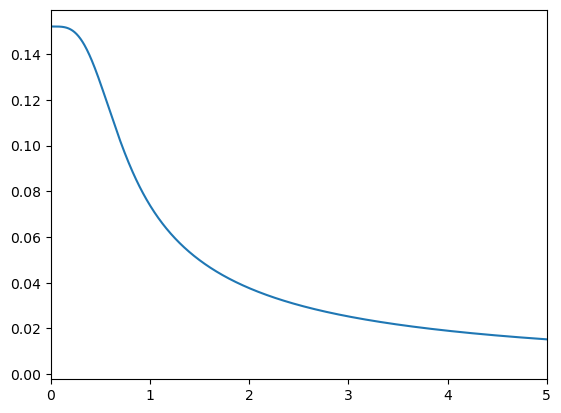

In [5]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.show()
     

In [6]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# In r = 0: 

SB1 = 1/2*(SB[1:(N+1),:] + SB[0:(N),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+1),:] + rSB[0:(N),:])
rrSB1 = 1/2*(rrSB[1:(N+1),:] + rrSB[0:(N),:])

# Base functions for Beta

SB2 = np.zeros([N,N+1])      
rSB2 = np.zeros([N,N+1])
rrSB2 = np.zeros([N,N+1])



for i in range(N):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  


for i in range(N):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [7]:
np.shape(SB2)

(50, 51)

In [8]:
np.shape(SB1)

(50, 51)

In [9]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+1),:] + qSB[0:(N),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+1),:] + qrSB[0:(N),:])
rrqSB1 = 1/2*(qSB[1:(N+1),:] + qrrSB[0:(N),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [10]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 30

#filter1 = np.ones(N+1)
#filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [11]:
np.dot(np.arange(1, 2*N + 2, 2), c0)

0.07663588486563337

In [12]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 7

It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0

Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)


#matriz = np.concatenate((array1, array2))

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')
  
  # ADM mass:
  Madm.append(2*np.dot(np.arange(1, 2*N + 2, 2), c0))

  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
#  print(t) 
#  if t > 9:
#    h=0.0001
 
    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))
  
  print('t =',t,'rPi =', max(rPi), sep = '\n') 
    

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
out_a.close()
out_p.close() 
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 

t =
0.0002
rPi =
0.009429037759067583
t =
0.0004
rPi =
0.018858040566596717
t =
0.0006000000000000001
rPi =
0.02828697160772816
t =
0.0008
rPi =
0.03771579581477676
t =
0.001
rPi =
0.04714447802776533
t =
0.0012000000000000001
rPi =
0.05657298301409708
t =
0.0014000000000000002
rPi =
0.06600127549315957
t =
0.0016000000000000003
rPi =
0.0754293201525848
t =
0.0018000000000000004
rPi =
0.08485708165903381
t =
0.0020000000000000005
rPi =
0.09428452466568084
t =
0.0022000000000000006
rPi =
0.10371161381766465
t =
0.0024000000000000007
rPi =
0.11313831375623677
t =
0.0026000000000000007
rPi =
0.1225645891220437
t =
0.002800000000000001
rPi =
0.13199040455781402
t =
0.003000000000000001
rPi =
0.14141572471062344
t =
0.003200000000000001
rPi =
0.15084051423385478
t =
0.003400000000000001
rPi =
0.16026473778893047
t =
0.003600000000000001
rPi =
0.16968836004687662
t =
0.0038000000000000013
rPi =
0.1791113456897522
t =
0.004000000000000001
rPi =
0.1885336594119815
t =
0.004200000000000001
rPi 

t =
0.053799999999999785
rPi =
2.430545865665199
t =
0.053999999999999784
rPi =
2.4388524127075866
t =
0.05419999999999978
rPi =
2.447151693149164
t =
0.05439999999999978
rPi =
2.4554436940224105
t =
0.05459999999999978
rPi =
2.4637284024743167
t =
0.05479999999999978
rPi =
2.472005805766229
t =
0.05499999999999978
rPi =
2.480275891273676
t =
0.05519999999999978
rPi =
2.4885386464862065
t =
0.055399999999999776
rPi =
2.496794059007213
t =
0.055599999999999775
rPi =
2.505042116553757
t =
0.05579999999999977
rPi =
2.513282806956397
t =
0.05599999999999977
rPi =
2.5215161181590027
t =
0.05619999999999977
rPi =
2.529742038218571
t =
0.05639999999999977
rPi =
2.5379605553050393
t =
0.05659999999999977
rPi =
2.546171657701094
t =
0.05679999999999977
rPi =
2.554375333801988
t =
0.056999999999999766
rPi =
2.562571572115322
t =
0.057199999999999765
rPi =
2.5707603612608807
t =
0.057399999999999764
rPi =
2.5789416899703954
t =
0.05759999999999976
rPi =
2.5871155470873597
t =
0.05779999999999976


t =
0.11140000000000114
rPi =
4.49938697239905
t =
0.11160000000000114
rPi =
4.505439123864761
t =
0.11180000000000115
rPi =
4.511483876127873
t =
0.11200000000000115
rPi =
4.517521236773861
t =
0.11220000000000116
rPi =
4.523551213414186
t =
0.11240000000000117
rPi =
4.529573813686058
t =
0.11260000000000117
rPi =
4.535589045252182
t =
0.11280000000000118
rPi =
4.541596915800524
t =
0.11300000000000118
rPi =
4.547597433044054
t =
0.11320000000000119
rPi =
4.553590604720507
t =
0.1134000000000012
rPi =
4.55957643859215
t =
0.1136000000000012
rPi =
4.565554942445526
t =
0.1138000000000012
rPi =
4.571526124091216
t =
0.11400000000000121
rPi =
4.5774899913636125
t =
0.11420000000000122
rPi =
4.583446552120667
t =
0.11440000000000122
rPi =
4.589395814243657
t =
0.11460000000000123
rPi =
4.5953377856369535
t =
0.11480000000000123
rPi =
4.601272474227785
t =
0.11500000000000124
rPi =
4.607199887966001
t =
0.11520000000000125
rPi =
4.613120034823831
t =
0.11540000000000125
rPi =
4.61903292279

t =
0.1696000000000028
rPi =
5.983438020425637
t =
0.1698000000000028
rPi =
5.98770687435031
t =
0.17000000000000282
rPi =
5.991970909808029
t =
0.17020000000000282
rPi =
5.996230135290178
t =
0.17040000000000283
rPi =
6.000484559278787
t =
0.17060000000000283
rPi =
6.004734190246548
t =
0.17080000000000284
rPi =
6.008979036656742
t =
0.17100000000000284
rPi =
6.013219106963227
t =
0.17120000000000285
rPi =
6.0174544096104094
t =
0.17140000000000286
rPi =
6.021684953033198
t =
0.17160000000000286
rPi =
6.025910745656991
t =
0.17180000000000287
rPi =
6.030131795897641
t =
0.17200000000000287
rPi =
6.034348112161423
t =
0.17220000000000288
rPi =
6.038559702844997
t =
0.17240000000000288
rPi =
6.042766576335396
t =
0.1726000000000029
rPi =
6.046968741009993
t =
0.1728000000000029
rPi =
6.051166205236454
t =
0.1730000000000029
rPi =
6.055358977372751
t =
0.1732000000000029
rPi =
6.059547065767091
t =
0.1734000000000029
rPi =
6.063730478757904
t =
0.17360000000000292
rPi =
6.06790922467383


t =
0.22960000000000452
rPi =
7.0823732865120475
t =
0.22980000000000453
rPi =
7.0855305665575825
t =
0.23000000000000453
rPi =
7.088685098788668
t =
0.23020000000000454
rPi =
7.091836888504323
t =
0.23040000000000455
rPi =
7.094985940993717
t =
0.23060000000000455
rPi =
7.0981322615361755
t =
0.23080000000000456
rPi =
7.101275855401198
t =
0.23100000000000456
rPi =
7.10441672784847
t =
0.23120000000000457
rPi =
7.107554884127869
t =
0.23140000000000457
rPi =
7.110690329479489
t =
0.23160000000000458
rPi =
7.113823069133637
t =
0.23180000000000459
rPi =
7.116953108310871
t =
0.2320000000000046
rPi =
7.120080452221987
t =
0.2322000000000046
rPi =
7.123205106068045
t =
0.2324000000000046
rPi =
7.126327075040373
t =
0.2326000000000046
rPi =
7.129446364320602
t =
0.23280000000000461
rPi =
7.1325629790806415
t =
0.23300000000000462
rPi =
7.135676924482727
t =
0.23320000000000463
rPi =
7.138788205679417
t =
0.23340000000000463
rPi =
7.1418968278136035
t =
0.23360000000000464
rPi =
7.14500279

t =
0.2892000000000008
rPi =
7.921858378203854
t =
0.28940000000000077
rPi =
7.924392556430052
t =
0.28960000000000075
rPi =
7.926925187913602
t =
0.2898000000000007
rPi =
7.929456275603035
t =
0.2900000000000007
rPi =
7.9319858224409066
t =
0.2902000000000007
rPi =
7.9345138313637875
t =
0.29040000000000066
rPi =
7.937040305302271
t =
0.29060000000000064
rPi =
7.939565247180985
t =
0.2908000000000006
rPi =
7.942088659918625
t =
0.2910000000000006
rPi =
7.944610546427935
t =
0.29120000000000057
rPi =
7.947130909615731
t =
0.29140000000000055
rPi =
7.949649752382921
t =
0.2916000000000005
rPi =
7.95216707762452
t =
0.2918000000000005
rPi =
7.954682888229625
t =
0.2920000000000005
rPi =
7.957197187081464
t =
0.29220000000000046
rPi =
7.9597099770574085
t =
0.29240000000000044
rPi =
7.962221261028951
t =
0.2926000000000004
rPi =
7.964731041861736
t =
0.2928000000000004
rPi =
7.967239322415583
t =
0.29300000000000037
rPi =
7.9697461055444805
t =
0.29320000000000035
rPi =
7.972251394096601


t =
0.34759999999999436
rPi =
8.617560012746786
t =
0.34779999999999434
rPi =
8.62005609322045
t =
0.3479999999999943
rPi =
8.622551573772641
t =
0.3481999999999943
rPi =
8.625046455928048
t =
0.34839999999999427
rPi =
8.627540741208271
t =
0.34859999999999425
rPi =
8.630034431131794
t =
0.3487999999999942
rPi =
8.632527527214016
t =
0.3489999999999942
rPi =
8.63502003096721
t =
0.3491999999999942
rPi =
8.6375119439006
t =
0.34939999999999416
rPi =
8.640003267520292
t =
0.34959999999999414
rPi =
8.642494003329356
t =
0.3497999999999941
rPi =
8.644984152827776
t =
0.3499999999999941
rPi =
8.64747371751245
t =
0.35019999999999407
rPi =
8.64996269887726
t =
0.35039999999999405
rPi =
8.652451098413028
t =
0.350599999999994
rPi =
8.654938917607518
t =
0.350799999999994
rPi =
8.65742615794548
t =
0.350999999999994
rPi =
8.659912820908607
t =
0.35119999999999396
rPi =
8.662398907975593
t =
0.35139999999999394
rPi =
8.664884420622107
t =
0.3515999999999939
rPi =
8.667369360320787
t =
0.3517999

t =
0.40739999999998777
rPi =
9.342981276015076
t =
0.40759999999998775
rPi =
9.345354027216192
t =
0.40779999999998773
rPi =
9.347726519904608
t =
0.4079999999999877
rPi =
9.350098754905998
t =
0.4081999999999877
rPi =
9.352470733044312
t =
0.40839999999998766
rPi =
9.354842455141766
t =
0.40859999999998764
rPi =
9.357213922018891
t =
0.4087999999999876
rPi =
9.35958513449451
t =
0.4089999999999876
rPi =
9.361956093385714
t =
0.4091999999999876
rPi =
9.364326799507923
t =
0.40939999999998755
rPi =
9.366697253674806
t =
0.40959999999998753
rPi =
9.369067456698401
t =
0.4097999999999875
rPi =
9.371437409389017
t =
0.4099999999999875
rPi =
9.373807112555264
t =
0.41019999999998746
rPi =
9.376176567004103
t =
0.41039999999998744
rPi =
9.378545773540768
t =
0.4105999999999874
rPi =
9.380914732968835
t =
0.4107999999999874
rPi =
9.383283446090205
t =
0.4109999999999874
rPi =
9.38565191370509
t =
0.41119999999998735
rPi =
9.388020136612047
t =
0.41139999999998733
rPi =
9.390388115607953
t =


t =
0.4663999999999813
rPi =
10.034749796209487
t =
0.46659999999998125
rPi =
10.037075681540319
t =
0.46679999999998123
rPi =
10.039401488922021
t =
0.4669999999999812
rPi =
10.04172721878487
t =
0.4671999999999812
rPi =
10.044052871558106
t =
0.46739999999998116
rPi =
10.046378447669923
t =
0.46759999999998114
rPi =
10.04870394754749
t =
0.4677999999999811
rPi =
10.051029371616947
t =
0.4679999999999811
rPi =
10.053354720303377
t =
0.4681999999999811
rPi =
10.055679994030852
t =
0.46839999999998105
rPi =
10.058005193222394
t =
0.46859999999998103
rPi =
10.060330318300025
t =
0.468799999999981
rPi =
10.062655369684698
t =
0.468999999999981
rPi =
10.06498034779636
t =
0.46919999999998097
rPi =
10.067305253053961
t =
0.46939999999998094
rPi =
10.069630085875364
t =
0.4695999999999809
rPi =
10.071954846677475
t =
0.4697999999999809
rPi =
10.074279535876137
t =
0.4699999999999809
rPi =
10.076604153886189
t =
0.47019999999998086
rPi =
10.078928701121471
t =
0.47039999999998083
rPi =
10.081

t =
0.5259999999999747
rPi =
10.825276293754257
t =
0.5261999999999747
rPi =
10.828062030770427
t =
0.5263999999999747
rPi =
10.830848085019033
t =
0.5265999999999746
rPi =
10.833634456819487
t =
0.5267999999999746
rPi =
10.836421146490794
t =
0.5269999999999746
rPi =
10.839208154351391
t =
0.5271999999999746
rPi =
10.841995480719223
t =
0.5273999999999746
rPi =
10.844783125911732
t =
0.5275999999999745
rPi =
10.847571090245847
t =
0.5277999999999745
rPi =
10.850359374037986
t =
0.5279999999999745
rPi =
10.8531479776041
t =
0.5281999999999745
rPi =
10.855936901259582
t =
0.5283999999999744
rPi =
10.858726145319364
t =
0.5285999999999744
rPi =
10.861515710097851
t =
0.5287999999999744
rPi =
10.86430559590895
t =
0.5289999999999744
rPi =
10.867095803066082
t =
0.5291999999999744
rPi =
10.86988633188214
t =
0.5293999999999743
rPi =
10.87267718266955
t =
0.5295999999999743
rPi =
10.875468355740205
t =
0.5297999999999743
rPi =
10.878259851405518
t =
0.5299999999999743
rPi =
10.8810516699764

t =
0.586799999999968
rPi =
11.688065668651802
t =
0.586999999999968
rPi =
11.690960379361501
t =
0.587199999999968
rPi =
11.693855483265287
t =
0.587399999999968
rPi =
11.696750980548638
t =
0.5875999999999679
rPi =
11.699646871396656
t =
0.5877999999999679
rPi =
11.702543155994055
t =
0.5879999999999679
rPi =
11.705439834525146
t =
0.5881999999999679
rPi =
11.708336907173832
t =
0.5883999999999678
rPi =
11.71123437412363
t =
0.5885999999999678
rPi =
11.714132235557676
t =
0.5887999999999678
rPi =
11.717030491658685
t =
0.5889999999999678
rPi =
11.719929142609002
t =
0.5891999999999677
rPi =
11.722828188590556
t =
0.5893999999999677
rPi =
11.725727629784899
t =
0.5895999999999677
rPi =
11.728627466373183
t =
0.5897999999999677
rPi =
11.731527698536167
t =
0.5899999999999677
rPi =
11.734428326454202
t =
0.5901999999999676
rPi =
11.737329350307274
t =
0.5903999999999676
rPi =
11.740230770274945
t =
0.5905999999999676
rPi =
11.743132586536412
t =
0.5907999999999676
rPi =
11.7460347992704

t =
0.6479999999999613
rPi =
12.592933308981731
t =
0.6481999999999613
rPi =
12.595955157103994
t =
0.6483999999999612
rPi =
12.598977437105367
t =
0.6485999999999612
rPi =
12.602000149052929
t =
0.6487999999999612
rPi =
12.605023293013334
t =
0.6489999999999612
rPi =
12.608046869052867
t =
0.6491999999999611
rPi =
12.611070877237424
t =
0.6493999999999611
rPi =
12.61409531763249
t =
0.6495999999999611
rPi =
12.617120190303174
t =
0.6497999999999611
rPi =
12.62014549531418
t =
0.649999999999961
rPi =
12.62317123272981
t =
0.650199999999961
rPi =
12.626197402613982
t =
0.650399999999961
rPi =
12.629224005030235
t =
0.650599999999961
rPi =
12.632251040041679
t =
0.650799999999961
rPi =
12.63527850771106
t =
0.6509999999999609
rPi =
12.63830640810071
t =
0.6511999999999609
rPi =
12.641334741272566
t =
0.6513999999999609
rPi =
12.644363507288201
t =
0.6515999999999609
rPi =
12.64739270620876
t =
0.6517999999999609
rPi =
12.65042233809499
t =
0.6519999999999608
rPi =
12.653452403007275
t =


t =
0.7069999999999548
rPi =
13.598362095910046
t =
0.7071999999999548
rPi =
13.602101132074303
t =
0.7073999999999547
rPi =
13.605841066712275
t =
0.7075999999999547
rPi =
13.609581900152415
t =
0.7077999999999547
rPi =
13.613323632723072
t =
0.7079999999999547
rPi =
13.617066264752484
t =
0.7081999999999546
rPi =
13.62080979656878
t =
0.7083999999999546
rPi =
13.624554228499955
t =
0.7085999999999546
rPi =
13.628299560873918
t =
0.7087999999999546
rPi =
13.632045794018433
t =
0.7089999999999546
rPi =
13.635792928261184
t =
0.7091999999999545
rPi =
13.639540963929718
t =
0.7093999999999545
rPi =
13.643289901351466
t =
0.7095999999999545
rPi =
13.647039740853762
t =
0.7097999999999545
rPi =
13.650790482763817
t =
0.7099999999999544
rPi =
13.654542127408723
t =
0.7101999999999544
rPi =
13.658294675115453
t =
0.7103999999999544
rPi =
13.662048126210886
t =
0.7105999999999544
rPi =
13.665802481021748
t =
0.7107999999999544
rPi =
13.669557739874692
t =
0.7109999999999543
rPi =
13.673313903

t =
0.7679999999999481
rPi =
14.781915224778407
t =
0.768199999999948
rPi =
14.785942922088905
t =
0.768399999999948
rPi =
14.789971611816336
t =
0.768599999999948
rPi =
14.794001294243996
t =
0.768799999999948
rPi =
14.798031969654964
t =
0.768999999999948
rPi =
14.802063638332138
t =
0.7691999999999479
rPi =
14.806096300558218
t =
0.7693999999999479
rPi =
14.810129956615702
t =
0.7695999999999479
rPi =
14.814164606786882
t =
0.7697999999999479
rPi =
14.818200251353886
t =
0.7699999999999478
rPi =
14.822236890598607
t =
0.7701999999999478
rPi =
14.82627452480278
t =
0.7703999999999478
rPi =
14.830313154247898
t =
0.7705999999999478
rPi =
14.834352779215296
t =
0.7707999999999477
rPi =
14.838393399986087
t =
0.7709999999999477
rPi =
14.842435016841193
t =
0.7711999999999477
rPi =
14.846477630061331
t =
0.7713999999999477
rPi =
14.850521239927033
t =
0.7715999999999477
rPi =
14.854565846718614
t =
0.7717999999999476
rPi =
14.858611450716191
t =
0.7719999999999476
rPi =
14.86265805219969

t =
0.8289999999999413
rPi =
16.057619958022215
t =
0.8291999999999413
rPi =
16.061962411139884
t =
0.8293999999999413
rPi =
16.06630593196215
t =
0.8295999999999413
rPi =
16.07065052069112
t =
0.8297999999999413
rPi =
16.074996177528586
t =
0.8299999999999412
rPi =
16.07934290267601
t =
0.8301999999999412
rPi =
16.083690696334443
t =
0.8303999999999412
rPi =
16.088039558704626
t =
0.8305999999999412
rPi =
16.09238948998694
t =
0.8307999999999411
rPi =
16.096740490381382
t =
0.8309999999999411
rPi =
16.101092560087647
t =
0.8311999999999411
rPi =
16.10544569930502
t =
0.8313999999999411
rPi =
16.109799908232414
t =
0.831599999999941
rPi =
16.11415518706847
t =
0.831799999999941
rPi =
16.11851153601137
t =
0.831999999999941
rPi =
16.12286895525901
t =
0.832199999999941
rPi =
16.12722744500889
t =
0.832399999999941
rPi =
16.131587005458147
t =
0.8325999999999409
rPi =
16.135947636803554
t =
0.8327999999999409
rPi =
16.14030933924156
t =
0.8329999999999409
rPi =
16.144672112968195
t =
0.8

t =
0.8897999999999346
rPi =
17.427698810816285
t =
0.8899999999999346
rPi =
17.432373262263038
t =
0.8901999999999346
rPi =
17.437048823095708
t =
0.8903999999999346
rPi =
17.44172549337269
t =
0.8905999999999346
rPi =
17.44640327315169
t =
0.8907999999999345
rPi =
17.451082162489904
t =
0.8909999999999345
rPi =
17.455762161443786
t =
0.8911999999999345
rPi =
17.460443270069288
t =
0.8913999999999345
rPi =
17.465125488421673
t =
0.8915999999999344
rPi =
17.469808816555602
t =
0.8917999999999344
rPi =
17.474493254525125
t =
0.8919999999999344
rPi =
17.479178802383657
t =
0.8921999999999344
rPi =
17.483865460183978
t =
0.8923999999999344
rPi =
17.488553227978272
t =
0.8925999999999343
rPi =
17.493242105818098
t =
0.8927999999999343
rPi =
17.49793209375433
t =
0.8929999999999343
rPi =
17.502623191837305
t =
0.8931999999999343
rPi =
17.50731540011667
t =
0.8933999999999342
rPi =
17.51200871864144
t =
0.8935999999999342
rPi =
17.51670314746002
t =
0.8937999999999342
rPi =
17.52139868662020

t =
0.950199999999928
rPi =
18.889838690514157
t =
0.950399999999928
rPi =
18.89484763355039
t =
0.950599999999928
rPi =
18.899857670160944
t =
0.9507999999999279
rPi =
18.90486880016144
t =
0.9509999999999279
rPi =
18.909881023366488
t =
0.9511999999999279
rPi =
18.914894339589644
t =
0.9513999999999279
rPi =
18.919908748643493
t =
0.9515999999999278
rPi =
18.924924250339515
t =
0.9517999999999278
rPi =
18.92994084448823
t =
0.9519999999999278
rPi =
18.93495853089909
t =
0.9521999999999278
rPi =
18.939977309380502
t =
0.9523999999999277
rPi =
18.944997179739868
t =
0.9525999999999277
rPi =
18.950018141783552
t =
0.9527999999999277
rPi =
18.955040195316847
t =
0.9529999999999277
rPi =
18.96006334014408
t =
0.9531999999999277
rPi =
18.96508757606843
t =
0.9533999999999276
rPi =
18.970112902892108
t =
0.9535999999999276
rPi =
18.975139320416258
t =
0.9537999999999276
rPi =
18.98016682844098
t =
0.9539999999999276
rPi =
18.98519542676534
t =
0.9541999999999276
rPi =
18.990225115187283
t =

t =
1.0103999999999214
rPi =
20.708208596617443
t =
1.0105999999999213
rPi =
20.714791159804744
t =
1.0107999999999213
rPi =
20.72137615197435
t =
1.0109999999999213
rPi =
20.727963574132218
t =
1.0111999999999213
rPi =
20.734553427284236
t =
1.0113999999999213
rPi =
20.741145712436282
t =
1.0115999999999212
rPi =
20.74774043059413
t =
1.0117999999999212
rPi =
20.75433758276351
t =
1.0119999999999212
rPi =
20.76093716995009
t =
1.0121999999999212
rPi =
20.767539193159504
t =
1.0123999999999211
rPi =
20.77414365339725
t =
1.0125999999999211
rPi =
20.78075055166885
t =
1.012799999999921
rPi =
20.787359888979676
t =
1.012999999999921
rPi =
20.793971666335135
t =
1.013199999999921
rPi =
20.800585884740478
t =
1.013399999999921
rPi =
20.80720254520091
t =
1.013599999999921
rPi =
20.813821648721568
t =
1.013799999999921
rPi =
20.82044319630757
t =
1.013999999999921
rPi =
20.827067188963877
t =
1.014199999999921
rPi =
20.8336936276954
t =
1.014399999999921
rPi =
20.84032251350699
t =
1.014599

t =
1.0697999999999148
rPi =
22.77430210612576
t =
1.0699999999999148
rPi =
22.78164958966547
t =
1.0701999999999148
rPi =
22.788999791934792
t =
1.0703999999999148
rPi =
22.79635271385185
t =
1.0705999999999147
rPi =
22.803708356334234
t =
1.0707999999999147
rPi =
22.811066720298847
t =
1.0709999999999147
rPi =
22.818427806662058
t =
1.0711999999999147
rPi =
22.825791616339576
t =
1.0713999999999146
rPi =
22.833158150246547
t =
1.0715999999999146
rPi =
22.840527409297454
t =
1.0717999999999146
rPi =
22.847899394406227
t =
1.0719999999999146
rPi =
22.85527410648614
t =
1.0721999999999146
rPi =
22.86265154644981
t =
1.0723999999999145
rPi =
22.87003171520932
t =
1.0725999999999145
rPi =
22.877414613676045
t =
1.0727999999999145
rPi =
22.884800242760786
t =
1.0729999999999145
rPi =
22.89218860337368
t =
1.0731999999999144
rPi =
22.89957969642426
t =
1.0733999999999144
rPi =
22.906973522821385
t =
1.0735999999999144
rPi =
22.914370083473337
t =
1.0737999999999144
rPi =
22.921769379287678


t =
1.1289999999999083
rPi =
25.071545861154792
t =
1.1291999999999083
rPi =
25.079734705279574
t =
1.1293999999999083
rPi =
25.087926500962354
t =
1.1295999999999082
rPi =
25.09612124880611
t =
1.1297999999999082
rPi =
25.10431894941213
t =
1.1299999999999082
rPi =
25.112519603380115
t =
1.1301999999999082
rPi =
25.120723211308057
t =
1.1303999999999081
rPi =
25.12892977379234
t =
1.1305999999999081
rPi =
25.13713929142765
t =
1.130799999999908
rPi =
25.14535176480702
t =
1.130999999999908
rPi =
25.15356719452184
t =
1.131199999999908
rPi =
25.161785581161816
t =
1.131399999999908
rPi =
25.170006925314922
t =
1.131599999999908
rPi =
25.17823122756753
t =
1.131799999999908
rPi =
25.186458488504282
t =
1.131999999999908
rPi =
25.194688708708117
t =
1.132199999999908
rPi =
25.202921888760322
t =
1.132399999999908
rPi =
25.211158029240405
t =
1.132599999999908
rPi =
25.219397130726247
t =
1.1327999999999079
rPi =
25.227639193793966
t =
1.1329999999999079
rPi =
25.235884219017986
t =
1.133

t =
1.1881999999999018
rPi =
27.62627908614196
t =
1.1883999999999018
rPi =
27.635359230199324
t =
1.1885999999999017
rPi =
27.644442409185643
t =
1.1887999999999017
rPi =
27.65352862296599
t =
1.1889999999999017
rPi =
27.662617871401896
t =
1.1891999999999017
rPi =
27.67171015435139
t =
1.1893999999999016
rPi =
27.680805471668915
t =
1.1895999999999016
rPi =
27.68990382320533
t =
1.1897999999999016
rPi =
27.69900520880801
t =
1.1899999999999016
rPi =
27.708109628320667
t =
1.1901999999999016
rPi =
27.717217081583495
t =
1.1903999999999015
rPi =
27.726327568433067
t =
1.1905999999999015
rPi =
27.73544108870235
t =
1.1907999999999015
rPi =
27.744557642220737
t =
1.1909999999999015
rPi =
27.75367722881393
t =
1.1911999999999014
rPi =
27.76279984830409
t =
1.1913999999999014
rPi =
27.77192550050971
t =
1.1915999999999014
rPi =
27.781054185245647
t =
1.1917999999999014
rPi =
27.790185902323074
t =
1.1919999999999014
rPi =
27.799320651549515
t =
1.1921999999999013
rPi =
27.808458432728884
t

t =
1.2461999999998954
rPi =
30.384985231820316
t =
1.2463999999998954
rPi =
30.394922934037883
t =
1.2465999999998953
rPi =
30.404863445226127
t =
1.2467999999998953
rPi =
30.414806763802133
t =
1.2469999999998953
rPi =
30.424752888176297
t =
1.2471999999998953
rPi =
30.434701816752185
t =
1.2473999999998953
rPi =
30.444653547926652
t =
1.2475999999998952
rPi =
30.45460808008971
t =
1.2477999999998952
rPi =
30.464565411624648
t =
1.2479999999998952
rPi =
30.474525540907855
t =
1.2481999999998952
rPi =
30.484488466308935
t =
1.2483999999998951
rPi =
30.49445418619065
t =
1.2485999999998951
rPi =
30.50442269890888
t =
1.248799999999895
rPi =
30.514394002812654
t =
1.248999999999895
rPi =
30.524368096244093
t =
1.249199999999895
rPi =
30.534344977538446
t =
1.249399999999895
rPi =
30.544324645024012
t =
1.249599999999895
rPi =
30.55430709702217
t =
1.249799999999895
rPi =
30.564292331847348
t =
1.249999999999895
rPi =
30.574280347807065
t =
1.250199999999895
rPi =
30.58427114320178
t =
1

t =
1.3053999999998889
rPi =
33.44001502376772
t =
1.3055999999998888
rPi =
33.45223251824933
t =
1.3057999999998888
rPi =
33.46655038432486
t =
1.3059999999998888
rPi =
33.48087656930506
t =
1.3061999999998888
rPi =
33.49521107823224
t =
1.3063999999998888
rPi =
33.509553916148796
t =
1.3065999999998887
rPi =
33.52390508809685
t =
1.3067999999998887
rPi =
33.538264599118584
t =
1.3069999999998887
rPi =
33.552632454256056
t =
1.3071999999998887
rPi =
33.56700865855124
t =
1.3073999999998887
rPi =
33.58139321704592
t =
1.3075999999998886
rPi =
33.59578613478183
t =
1.3077999999998886
rPi =
33.61018741680056
t =
1.3079999999998886
rPi =
33.62459706814348
t =
1.3081999999998886
rPi =
33.63901509385187
t =
1.3083999999998885
rPi =
33.65344149896682
t =
1.3085999999998885
rPi =
33.667876288529186
t =
1.3087999999998885
rPi =
33.68231946757966
t =
1.3089999999998885
rPi =
33.69677104115871
t =
1.3091999999998885
rPi =
33.71123101430657
t =
1.3093999999998884
rPi =
33.725699392063255
t =
1.30

t =
1.3649999999998823
rPi =
38.09181226865258
t =
1.3651999999998823
rPi =
38.10881747984018
t =
1.3653999999998823
rPi =
38.12583243645505
t =
1.3655999999998822
rPi =
38.1428571427589
t =
1.3657999999998822
rPi =
38.15989160300746
t =
1.3659999999998822
rPi =
38.17693582145002
t =
1.3661999999998822
rPi =
38.19398980232972
t =
1.3663999999998822
rPi =
38.211053549883424
t =
1.3665999999998821
rPi =
38.228127068341635
t =
1.366799999999882
rPi =
38.24521036192855
t =
1.366999999999882
rPi =
38.26230343486192
t =
1.367199999999882
rPi =
38.27940629135312
t =
1.367399999999882
rPi =
38.296518935607075
t =
1.367599999999882
rPi =
38.31364137182225
t =
1.367799999999882
rPi =
38.3307736041905
t =
1.367999999999882
rPi =
38.347915636897284
t =
1.368199999999882
rPi =
38.365067474121325
t =
1.368399999999882
rPi =
38.382229120034864
t =
1.368599999999882
rPi =
38.39940057880334
t =
1.3687999999998819
rPi =
38.41658185458572
t =
1.3689999999998819
rPi =
38.43377295153408
t =
1.3691999999998

t =
1.422399999999876
rPi =
43.38659293989537
t =
1.422599999999876
rPi =
43.40653530096423
t =
1.422799999999876
rPi =
43.42648822080499
t =
1.422999999999876
rPi =
43.446451700134396
t =
1.423199999999876
rPi =
43.46642573964862
t =
1.4233999999998759
rPi =
43.48641034002317
t =
1.4235999999998759
rPi =
43.506405501913015
t =
1.4237999999998758
rPi =
43.52641122595235
t =
1.4239999999998758
rPi =
43.54642751275456
t =
1.4241999999998758
rPi =
43.5664543629122
t =
1.4243999999998758
rPi =
43.586491776996844
t =
1.4245999999998757
rPi =
43.60653975555906
t =
1.4247999999998757
rPi =
43.626598299128226
t =
1.4249999999998757
rPi =
43.64666740821277
t =
1.4251999999998757
rPi =
43.666747083299605
t =
1.4253999999998757
rPi =
43.68683732485453
t =
1.4255999999998756
rPi =
43.706938133321856
t =
1.4257999999998756
rPi =
43.72704950912441
t =
1.4259999999998756
rPi =
43.747171452663565
t =
1.4261999999998756
rPi =
43.767303964318934
t =
1.4263999999998755
rPi =
43.78744704444859
t =
1.42659

t =
1.4803999999998696
rPi =
49.60792921272953
t =
1.4805999999998696
rPi =
49.63085638361667
t =
1.4807999999998696
rPi =
49.65379310177055
t =
1.4809999999998695
rPi =
49.676739357942054
t =
1.4811999999998695
rPi =
49.69969514282968
t =
1.4813999999998695
rPi =
49.72266044707943
t =
1.4815999999998695
rPi =
49.74563526128482
t =
1.4817999999998694
rPi =
49.76861957598653
t =
1.4819999999998694
rPi =
49.79161338167225
t =
1.4821999999998694
rPi =
49.8146166687767
t =
1.4823999999998694
rPi =
49.83762942768124
t =
1.4825999999998694
rPi =
49.86065164871392
t =
1.4827999999998693
rPi =
49.88368332214921
t =
1.4829999999998693
rPi =
49.90672443820787
t =
1.4831999999998693
rPi =
49.929774987056646
t =
1.4833999999998693
rPi =
49.952834958808474
t =
1.4835999999998692
rPi =
49.97590434352196
t =
1.4837999999998692
rPi =
49.99898313120136
t =
1.4839999999998692
rPi =
50.02207131179646
t =
1.4841999999998692
rPi =
50.045168875202314
t =
1.4843999999998692
rPi =
50.06827581125912
t =
1.4845

t =
1.5385999999998632
rPi =
56.62672884222074
t =
1.5387999999998632
rPi =
56.65177869349331
t =
1.5389999999998631
rPi =
56.67683243386161
t =
1.5391999999998631
rPi =
56.70189003047233
t =
1.539399999999863
rPi =
56.726951450354946
t =
1.539599999999863
rPi =
56.75201666042123
t =
1.539799999999863
rPi =
56.77708562746502
t =
1.539999999999863
rPi =
56.80215831816188
t =
1.540199999999863
rPi =
56.82723469906874
t =
1.540399999999863
rPi =
56.852314736623796
t =
1.540599999999863
rPi =
56.87739839714593
t =
1.540799999999863
rPi =
56.90248564683459
t =
1.540999999999863
rPi =
56.92757645176946
t =
1.541199999999863
rPi =
56.952670777909994
t =
1.5413999999998629
rPi =
56.97776859109531
t =
1.5415999999998629
rPi =
57.002869857043876
t =
1.5417999999998628
rPi =
57.02797454135291
t =
1.5419999999998628
rPi =
57.05308260949849
t =
1.5421999999998628
rPi =
57.07819402683491
t =
1.5423999999998628
rPi =
57.10330875859445
t =
1.5425999999998627
rPi =
57.12842676988718
t =
1.5427999999998

t =
1.5985999999998566
rPi =
65.25315354876264
t =
1.5987999999998566
rPi =
65.30045645603244
t =
1.5989999999998565
rPi =
65.34780388020091
t =
1.5991999999998565
rPi =
65.39519584941722
t =
1.5993999999998565
rPi =
65.44263239175491
t =
1.5995999999998565
rPi =
65.49011353521132
t =
1.5997999999998564
rPi =
65.53763930770721
t =
1.5999999999998564
rPi =
65.58520973708579
t =
1.6001999999998564
rPi =
65.63282485111267
t =
1.6003999999998564
rPi =
65.68048467747505
t =
1.6005999999998564
rPi =
65.72818924378123
t =
1.6007999999998563
rPi =
65.77593857755984
t =
1.6009999999998563
rPi =
65.82373270625973
t =
1.6011999999998563
rPi =
65.87157165724906
t =
1.6013999999998563
rPi =
65.91945545781489
t =
1.6015999999998562
rPi =
65.96738413516245
t =
1.6017999999998562
rPi =
66.01535771641475
t =
1.6019999999998562
rPi =
66.06337622861194
t =
1.6021999999998562
rPi =
66.11143969871087
t =
1.6023999999998562
rPi =
66.15954815358423
t =
1.6025999999998561
rPi =
66.20770162002033
t =
1.6027999

t =
1.6593999999998499
rPi =
81.77343359231402
t =
1.6595999999998499
rPi =
81.83496723724993
t =
1.6597999999998498
rPi =
81.89654693036495
t =
1.6599999999998498
rPi =
81.95817263724338
t =
1.6601999999998498
rPi =
82.01984432306809
t =
1.6603999999998498
rPi =
82.08156195261802
t =
1.6605999999998498
rPi =
82.14332549026717
t =
1.6607999999998497
rPi =
82.2051348999822
t =
1.6609999999998497
rPi =
82.26699014532085
t =
1.6611999999998497
rPi =
82.32889118942981
t =
1.6613999999998497
rPi =
82.39083799504303
t =
1.6615999999998496
rPi =
82.45283052447996
t =
1.6617999999998496
rPi =
82.51486873964345
t =
1.6619999999998496
rPi =
82.57695260201773
t =
1.6621999999998496
rPi =
82.63908207266698
t =
1.6623999999998496
rPi =
82.70125711223297
t =
1.6625999999998495
rPi =
82.76347768093343
t =
1.6627999999998495
rPi =
82.82574373855982
t =
1.6629999999998495
rPi =
82.88805524447585
t =
1.6631999999998495
rPi =
82.95041215761512
t =
1.6633999999998494
rPi =
83.01281443647947
t =
1.66359999

t =
1.7181999999998434
rPi =
101.54163912989338
t =
1.7183999999998434
rPi =
101.61284102330595
t =
1.7185999999998434
rPi =
101.68405129103641
t =
1.7187999999998433
rPi =
101.75526966464226
t =
1.7189999999998433
rPi =
101.82649587433065
t =
1.7191999999998433
rPi =
101.89772964895405
t =
1.7193999999998433
rPi =
101.96897071600452
t =
1.7195999999998433
rPi =
102.04021880160921
t =
1.7197999999998432
rPi =
102.11147363052507
t =
1.7199999999998432
rPi =
102.1827349261334
t =
1.7201999999998432
rPi =
102.25400241043536
t =
1.7203999999998432
rPi =
102.32527580404629
t =
1.7205999999998431
rPi =
102.39655482619087
t =
1.7207999999998431
rPi =
102.4678391946977
t =
1.720999999999843
rPi =
102.53912862599444
t =
1.721199999999843
rPi =
102.61042283510236
t =
1.721399999999843
rPi =
102.68172153563116
t =
1.721599999999843
rPi =
102.75302443977378
t =
1.721799999999843
rPi =
102.82433125830123
t =
1.721999999999843
rPi =
102.8956417005571
t =
1.722199999999843
rPi =
102.96695547445258
t 

t =
1.776999999999837
rPi =
121.1955572574391
t =
1.777199999999837
rPi =
121.25017352535242
t =
1.7773999999998369
rPi =
121.30463497631527
t =
1.7775999999998369
rPi =
121.3589406593839
t =
1.7777999999998368
rPi =
121.41308962009312
t =
1.7779999999998368
rPi =
121.46708090044638
t =
1.7781999999998368
rPi =
121.5209135389069
t =
1.7783999999998368
rPi =
121.57458657038839
t =
1.7785999999998368
rPi =
121.62809902624572
t =
1.7787999999998367
rPi =
121.68144993426552
t =
1.7789999999998367
rPi =
121.73463831865739
t =
1.7791999999998367
rPi =
121.787663200044
t =
1.7793999999998367
rPi =
121.84052359545227
t =
1.7795999999998366
rPi =
121.89321851830408
t =
1.7797999999998366
rPi =
121.94574697840686
t =
1.7799999999998366
rPi =
121.99810798194432
t =
1.7801999999998366
rPi =
122.0503005314673
t =
1.7803999999998366
rPi =
122.1023236258845
t =
1.7805999999998365
rPi =
122.16694358245913
t =
1.7807999999998365
rPi =
122.33209629581505
t =
1.7809999999998365
rPi =
122.4974840814132
t 

t =
1.8335999999998307
rPi =
173.24384935941538
t =
1.8337999999998307
rPi =
173.45610064513403
t =
1.8339999999998307
rPi =
173.6683855219181
t =
1.8341999999998306
rPi =
173.88070195960674
t =
1.8343999999998306
rPi =
174.09304791325462
t =
1.8345999999998306
rPi =
174.30542132305493
t =
1.8347999999998306
rPi =
174.51782011426369
t =
1.8349999999998305
rPi =
174.7302421971228
t =
1.8351999999998305
rPi =
174.94268546678322
t =
1.8353999999998305
rPi =
175.15514780322715
t =
1.8355999999998305
rPi =
175.36762707119192
t =
1.8357999999998305
rPi =
175.5801211200906
t =
1.8359999999998304
rPi =
175.79262778393505
t =
1.8361999999998304
rPi =
176.0051448812569
t =
1.8363999999998304
rPi =
176.2176702150293
t =
1.8365999999998304
rPi =
176.43020157258786
t =
1.8367999999998303
rPi =
176.64273672555137
t =
1.8369999999998303
rPi =
176.8552734297426
t =
1.8371999999998303
rPi =
177.0678094251081
t =
1.8373999999998303
rPi =
177.28034243563826
t =
1.8375999999998303
rPi =
177.49287016928724

t =
1.8901999999998245
rPi =
221.9086599962413
t =
1.8903999999998244
rPi =
221.97063082966633
t =
1.8905999999998244
rPi =
222.031127816565
t =
1.8907999999998244
rPi =
222.09014105590015
t =
1.8909999999998244
rPi =
222.14766060842481
t =
1.8911999999998244
rPi =
222.20367649671712
t =
1.8913999999998243
rPi =
222.2581787052166
t =
1.8915999999998243
rPi =
222.31115718026396
t =
1.8917999999998243
rPi =
222.36260183014386
t =
1.8919999999998243
rPi =
222.41250252513177
t =
1.8921999999998242
rPi =
222.4608490975427
t =
1.8923999999998242
rPi =
222.5076313417848
t =
1.8925999999998242
rPi =
222.5528390144147
t =
1.8927999999998242
rPi =
222.59646183419824
t =
1.8929999999998242
rPi =
222.6384894821725
t =
1.8931999999998241
rPi =
222.6789116017135
t =
1.8933999999998241
rPi =
222.7177177986058
t =
1.893599999999824
rPi =
222.7548976411167
t =
1.893799999999824
rPi =
222.7904406600744
t =
1.893999999999824
rPi =
222.82433634894875
t =
1.894199999999824
rPi =
222.8565741639375
t =
1.894

t =
1.949599999999818
rPi =
355.69481692589227
t =
1.949799999999818
rPi =
355.5398944262635
t =
1.9499999999998179
rPi =
355.3742408634149
t =
1.9501999999998179
rPi =
355.19777729932605
t =
1.9503999999998178
rPi =
355.0104250985482
t =
1.9505999999998178
rPi =
354.81210594735677
t =
1.9507999999998178
rPi =
354.6027418731933
t =
1.9509999999998178
rPi =
354.3822552643939
t =
1.9511999999998177
rPi =
354.1505688902081
t =
1.9513999999998177
rPi =
353.9076059210993
t =
1.9515999999998177
rPi =
353.6532899493329
t =
1.9517999999998177
rPi =
353.3875450098437
t =
1.9519999999998177
rPi =
353.1102956013871
t =
1.9521999999998176
rPi =
352.82146670796504
t =
1.9523999999998176
rPi =
352.52098382052935
t =
1.9525999999998176
rPi =
352.20877295895707
t =
1.9527999999998176
rPi =
351.8847606942962
t =
1.9529999999998175
rPi =
351.54887417127685
t =
1.9531999999998175
rPi =
351.20104113108613
t =
1.9533999999998175
rPi =
350.84118993440217
t =
1.9535999999998175
rPi =
350.4692495846806
t =
1.

t =
2.0097999999998115
rPi =
1.3602973281020418
t =
2.0099999999998115
rPi =
1.377715161494242
t =
2.0101999999998115
rPi =
1.395126638908642
t =
2.0103999999998114
rPi =
1.4125299347317641
t =
2.0105999999998114
rPi =
1.4299232227632983
t =
2.0107999999998114
rPi =
1.4473046766268625
t =
2.0109999999998114
rPi =
1.4646724701749794
t =
2.0111999999998114
rPi =
1.4820247778880107
t =
2.0113999999998113
rPi =
1.4993597752671484
t =
2.0115999999998113
rPi =
1.51667563922127
t =
2.0117999999998113
rPi =
1.5339705484477009
t =
2.0119999999998113
rPi =
1.5512426838067073
t =
2.0121999999998113
rPi =
1.568490228689806
t =
2.0123999999998112
rPi =
1.585711369381756
t =
2.012599999999811
rPi =
1.6029042954162418
t =
2.012799999999811
rPi =
1.6200671999251623
t =
2.012999999999811
rPi =
1.6371982799815985
t =
2.013199999999811
rPi =
1.6542957369363513
t =
2.013399999999811
rPi =
1.6713577767480405
t =
2.013599999999811
rPi =
1.6883826103067976
t =
2.013799999999811
rPi =
1.7053684537515668
t =
2

t =
2.0709999999998048
rPi =
10.303244093253355
t =
2.0711999999998048
rPi =
10.299828821289895
t =
2.0713999999998047
rPi =
10.296040296402392
t =
2.0715999999998047
rPi =
10.291878853148601
t =
2.0717999999998047
rPi =
10.287344836179756
t =
2.0719999999998047
rPi =
10.282438600239262
t =
2.0721999999998046
rPi =
10.277160510160924
t =
2.0723999999998046
rPi =
10.27151094086677
t =
2.0725999999998046
rPi =
10.265490277364515
t =
2.0727999999998046
rPi =
10.25909891474422
t =
2.0729999999998046
rPi =
10.252337258175123
t =
2.0731999999998045
rPi =
10.245205722901414
t =
2.0733999999998045
rPi =
10.237704734238129
t =
2.0735999999998045
rPi =
10.229834727566113
t =
2.0737999999998045
rPi =
10.221596148326869
t =
2.0739999999998044
rPi =
10.212989452016897
t =
2.0741999999998044
rPi =
10.204015104181556
t =
2.0743999999998044
rPi =
10.194673580408477
t =
2.0745999999998044
rPi =
10.184965366320686
t =
2.0747999999998044
rPi =
10.174890957569032
t =
2.0749999999998043
rPi =
10.1644508598

t =
2.132199999999798
rPi =
8.869099682746207
t =
2.132399999999798
rPi =
8.917024450441946
t =
2.132599999999798
rPi =
8.964895003654982
t =
2.132799999999798
rPi =
9.012710635539559
t =
2.132999999999798
rPi =
9.060470635356692
t =
2.133199999999798
rPi =
9.108174288515626
t =
2.133399999999798
rPi =
9.155820876614841
t =
2.133599999999798
rPi =
9.203409677483457
t =
2.133799999999798
rPi =
9.250939965223713
t =
2.133999999999798
rPi =
9.298411010250842
t =
2.134199999999798
rPi =
9.345822079336742
t =
2.134399999999798
rPi =
9.393172435649873
t =
2.1345999999997978
rPi =
9.44046133879874
t =
2.1347999999997977
rPi =
9.487688044872659
t =
2.1349999999997977
rPi =
9.534851806484083
t =
2.1351999999997977
rPi =
9.581951872810999
t =
2.1353999999997977
rPi =
9.62898748963851
t =
2.1355999999997977
rPi =
9.67595789940123
t =
2.1357999999997976
rPi =
9.722862341225644
t =
2.1359999999997976
rPi =
9.769700050972528
t =
2.1361999999997976
rPi =
9.816470261278319
t =
2.1363999999997976
rPi =

t =
2.1933999999997913
rPi =
17.169552416815037
t =
2.1935999999997913
rPi =
17.164214317541163
t =
2.1937999999997913
rPi =
17.15861264818754
t =
2.1939999999997912
rPi =
17.152747249059445
t =
2.194199999999791
rPi =
17.14661796588431
t =
2.194399999999791
rPi =
17.140224649816
t =
2.194599999999791
rPi =
17.13356715743834
t =
2.194799999999791
rPi =
17.126645350770637
t =
2.194999999999791
rPi =
17.11945909726888
t =
2.195199999999791
rPi =
17.11200826983185
t =
2.195399999999791
rPi =
17.10429274680274
t =
2.195599999999791
rPi =
17.096312411972924
t =
2.195799999999791
rPi =
17.08806715458443
t =
2.195999999999791
rPi =
17.079556869333835
t =
2.196199999999791
rPi =
17.07078145637299
t =
2.196399999999791
rPi =
17.061740821312558
t =
2.196599999999791
rPi =
17.052434875224066
t =
2.196799999999791
rPi =
17.04286353464114
t =
2.196999999999791
rPi =
17.033026721561818
t =
2.197199999999791
rPi =
17.022924363449953
t =
2.197399999999791
rPi =
17.012556393236387
t =
2.197599999999791

t =
2.2541999999997846
rPi =
4.458961339879889
t =
2.2543999999997846
rPi =
4.389068781656057
t =
2.2545999999997846
rPi =
4.319074416093075
t =
2.2547999999997845
rPi =
4.248979195154655
t =
2.2549999999997845
rPi =
4.178784071189257
t =
2.2551999999997845
rPi =
4.108489996905675
t =
2.2553999999997845
rPi =
4.0380979253484774
t =
2.2555999999997844
rPi =
3.9676088098736657
t =
2.2557999999997844
rPi =
3.8970236041264403
t =
2.2559999999997844
rPi =
3.826343262013893
t =
2.2561999999997844
rPi =
3.7555687376840035
t =
2.2563999999997844
rPi =
3.684700985499535
t =
2.2565999999997843
rPi =
3.613740960015517
t =
2.2567999999997843
rPi =
3.542689615954319
t =
2.2569999999997843
rPi =
3.4715479081825498
t =
2.2571999999997843
rPi =
3.4003167916865458
t =
2.2573999999997842
rPi =
3.328997221549366
t =
2.2575999999997842
rPi =
3.257590152926717
t =
2.257799999999784
rPi =
3.1860965410231086
t =
2.257999999999784
rPi =
3.1145173410680718
t =
2.258199999999784
rPi =
3.042853508293822
t =
2.25

t =
2.315399999999778
rPi =
11.863078084651384
t =
2.315599999999778
rPi =
11.89222218640386
t =
2.315799999999778
rPi =
11.921174412606872
t =
2.315999999999778
rPi =
11.949934919433982
t =
2.3161999999997778
rPi =
11.978503864246665
t =
2.3163999999997777
rPi =
12.006881405594036
t =
2.3165999999997777
rPi =
12.035067703216177
t =
2.3167999999997777
rPi =
12.063062918045627
t =
2.3169999999997777
rPi =
12.09086721220917
t =
2.3171999999997777
rPi =
12.11848074902978
t =
2.3173999999997776
rPi =
12.145903693028952
t =
2.3175999999997776
rPi =
12.17313620992755
t =
2.3177999999997776
rPi =
12.200178466649028
t =
2.3179999999997776
rPi =
12.227030631319757
t =
2.3181999999997775
rPi =
12.253692873271703
t =
2.3183999999997775
rPi =
12.28016536304407
t =
2.3185999999997775
rPi =
12.306448272384172
t =
2.3187999999997775
rPi =
12.332541774250963
t =
2.3189999999997775
rPi =
12.358446042814922
t =
2.3191999999997774
rPi =
12.384161253460741
t =
2.3193999999997774
rPi =
12.40968758278762
t 

t =
2.375799999999771
rPi =
13.067482549850821
t =
2.375999999999771
rPi =
13.051239063496897
t =
2.376199999999771
rPi =
13.034903360861993
t =
2.376399999999771
rPi =
13.018475902933046
t =
2.376599999999771
rPi =
13.001957151020656
t =
2.376799999999771
rPi =
12.985347566751276
t =
2.376999999999771
rPi =
12.968647612060877
t =
2.377199999999771
rPi =
12.951857749186816
t =
2.377399999999771
rPi =
12.934978440660956
t =
2.377599999999771
rPi =
12.918010149302162
t =
2.377799999999771
rPi =
12.900953338208955
t =
2.377999999999771
rPi =
12.883808470752143
t =
2.378199999999771
rPi =
12.866576010568057
t =
2.378399999999771
rPi =
12.849256421548999
t =
2.378599999999771
rPi =
12.831850167839386
t =
2.378799999999771
rPi =
12.814357713825016
t =
2.378999999999771
rPi =
12.796779524127468
t =
2.379199999999771
rPi =
12.779116063595625
t =
2.379399999999771
rPi =
12.761367797299767
t =
2.379599999999771
rPi =
12.743535190522453
t =
2.3797999999997708
rPi =
12.725618708751663
t =
2.379999

t =
2.4345999999997647
rPi =
6.220382388321078
t =
2.4347999999997647
rPi =
6.196009421163613
t =
2.4349999999997647
rPi =
6.171663856275957
t =
2.4351999999997647
rPi =
6.147345961872836
t =
2.4353999999997646
rPi =
6.123056004876016
t =
2.4355999999997646
rPi =
6.0987942509131345
t =
2.4357999999997646
rPi =
6.074560964317185
t =
2.4359999999997646
rPi =
6.050356408125616
t =
2.4361999999997646
rPi =
6.026180844080498
t =
2.4363999999997645
rPi =
6.002034532626892
t =
2.4365999999997645
rPi =
5.977917732913885
t =
2.4367999999997645
rPi =
5.953830702791964
t =
2.4369999999997645
rPi =
5.929773698814946
t =
2.4371999999997644
rPi =
5.905746976237688
t =
2.4373999999997644
rPi =
5.881750789016864
t =
2.4375999999997644
rPi =
5.857785389810176
t =
2.4377999999997644
rPi =
5.83385102997644
t =
2.4379999999997644
rPi =
5.809947959575052
t =
2.4381999999997643
rPi =
5.78607642736629
t =
2.4383999999997643
rPi =
5.7622366808101315
t =
2.4385999999997643
rPi =
5.738428966067658
t =
2.4387999

t =
2.493799999999758
rPi =
9.176189529541697
t =
2.493999999999758
rPi =
9.204692777652356
t =
2.494199999999758
rPi =
9.233187609873038
t =
2.494399999999758
rPi =
9.26167402562218
t =
2.494599999999758
rPi =
9.29015202284531
t =
2.494799999999758
rPi =
9.318621598021394
t =
2.494999999999758
rPi =
9.34708274616283
t =
2.495199999999758
rPi =
9.375535460820416
t =
2.495399999999758
rPi =
9.403979734086684
t =
2.495599999999758
rPi =
9.432415556598473
t =
2.495799999999758
rPi =
9.460842917541411
t =
2.495999999999758
rPi =
9.489261804652648
t =
2.496199999999758
rPi =
9.517672204224668
t =
2.496399999999758
rPi =
9.546074101109967
t =
2.496599999999758
rPi =
9.574467478723697
t =
2.496799999999758
rPi =
9.602852319047392
t =
2.496999999999758
rPi =
9.631228602634044
t =
2.497199999999758
rPi =
9.659596308611276
t =
2.497399999999758
rPi =
9.68795541468588
t =
2.497599999999758
rPi =
9.716305897147533
t =
2.4977999999997578
rPi =
9.744647730872787
t =
2.4979999999997577
rPi =
9.772980

t =
2.551799999999752
rPi =
16.75986852261139
t =
2.551999999999752
rPi =
16.781799090212797
t =
2.552199999999752
rPi =
16.803686496549194
t =
2.5523999999997518
rPi =
16.8255306181862
t =
2.5525999999997517
rPi =
16.84733133242121
t =
2.5527999999997517
rPi =
16.869088517286873
t =
2.5529999999997517
rPi =
16.890802051557973
t =
2.5531999999997517
rPi =
16.912471814753765
t =
2.5533999999997516
rPi =
16.934097687147425
t =
2.5535999999997516
rPi =
16.955679549768
t =
2.5537999999997516
rPi =
16.977217284407487
t =
2.5539999999997516
rPi =
16.998710773625337
t =
2.5541999999997516
rPi =
17.020159900752695
t =
2.5543999999997515
rPi =
17.041564549898585
t =
2.5545999999997515
rPi =
17.062924605954013
t =
2.5547999999997515
rPi =
17.08423995459909
t =
2.5549999999997515
rPi =
17.10551048230348
t =
2.5551999999997514
rPi =
17.126736076337377
t =
2.5553999999997514
rPi =
17.147916624768783
t =
2.5555999999997514
rPi =
17.16905201647412
t =
2.5557999999997514
rPi =
17.19014214114395
t =
2.

t =
2.6089999999997455
rPi =
21.04242665250525
t =
2.6091999999997455
rPi =
21.050492526854438
t =
2.6093999999997455
rPi =
21.058516862101815
t =
2.6095999999997455
rPi =
21.066499776446776
t =
2.6097999999997454
rPi =
21.074441388531213
t =
2.6099999999997454
rPi =
21.082341817431956
t =
2.6101999999997454
rPi =
21.090201182665307
t =
2.6103999999997454
rPi =
21.098019604173615
t =
2.6105999999997453
rPi =
21.105797202319568
t =
2.6107999999997453
rPi =
21.113534097890152
t =
2.6109999999997453
rPi =
21.12123041208597
t =
2.6111999999997453
rPi =
21.128886266515998
t =
2.6113999999997453
rPi =
21.136501783194685
t =
2.6115999999997452
rPi =
21.144077084537418
t =
2.611799999999745
rPi =
21.151612293355942
t =
2.611999999999745
rPi =
21.15910753285312
t =
2.612199999999745
rPi =
21.166562926619356
t =
2.612399999999745
rPi =
21.17397859862199
t =
2.612599999999745
rPi =
21.181354673211924
t =
2.612799999999745
rPi =
21.188691275108845
t =
2.612999999999745
rPi =
21.195988529402808
t =

t =
2.668399999999739
rPi =
22.185951742000395
t =
2.668599999999739
rPi =
22.187516735984637
t =
2.668799999999739
rPi =
22.189078570747206
t =
2.668999999999739
rPi =
22.190637351047254
t =
2.669199999999739
rPi =
22.192193181350962
t =
2.669399999999739
rPi =
22.193746165840373
t =
2.669599999999739
rPi =
22.195296408430355
t =
2.669799999999739
rPi =
22.196844012735088
t =
2.669999999999739
rPi =
22.198389082092685
t =
2.670199999999739
rPi =
22.199931719543375
t =
2.6703999999997388
rPi =
22.201472027862525
t =
2.6705999999997387
rPi =
22.20301010951984
t =
2.6707999999997387
rPi =
22.20454606671704
t =
2.6709999999997387
rPi =
22.206080001353747
t =
2.6711999999997387
rPi =
22.207612015040503
t =
2.6713999999997387
rPi =
22.209142209115104
t =
2.6715999999997386
rPi =
22.21067068461892
t =
2.6717999999997386
rPi =
22.212197542295733
t =
2.6719999999997386
rPi =
22.213722882612185
t =
2.6721999999997386
rPi =
22.21524680573151
t =
2.6723999999997385
rPi =
22.216769411539804
t =
2.

t =
2.7293999999997323
rPi =
22.89009823088931
t =
2.7295999999997322
rPi =
22.89392773790519
t =
2.729799999999732
rPi =
22.897768702240977
t =
2.729999999999732
rPi =
22.901621101976353
t =
2.730199999999732
rPi =
22.905484914764166
t =
2.730399999999732
rPi =
22.90936011785271
t =
2.730599999999732
rPi =
22.91324668806219
t =
2.730799999999732
rPi =
22.917144601801166
t =
2.730999999999732
rPi =
22.92105383506584
t =
2.731199999999732
rPi =
22.924974363420784
t =
2.731399999999732
rPi =
22.928906162048573
t =
2.731599999999732
rPi =
22.932849205717456
t =
2.731799999999732
rPi =
22.93680346878826
t =
2.731999999999732
rPi =
22.940768925218933
t =
2.732199999999732
rPi =
22.94474554857281
t =
2.732399999999732
rPi =
22.94873331202417
t =
2.732599999999732
rPi =
22.9527321883628
t =
2.732799999999732
rPi =
22.95674214996064
t =
2.732999999999732
rPi =
22.960763168844785
t =
2.733199999999732
rPi =
22.96479521661642
t =
2.733399999999732
rPi =
22.96883826452262
t =
2.733599999999732
rP

t =
2.7905999999997255
rPi =
24.414255939799045
t =
2.7907999999997255
rPi =
24.419766329390413
t =
2.7909999999997255
rPi =
24.42527698045191
t =
2.7911999999997255
rPi =
24.43078787538404
t =
2.7913999999997254
rPi =
24.43629899674418
t =
2.7915999999997254
rPi =
24.441810327231792
t =
2.7917999999997254
rPi =
24.44732184968185
t =
2.7919999999997254
rPi =
24.452833547080374
t =
2.7921999999997253
rPi =
24.458345402538058
t =
2.7923999999997253
rPi =
24.463857399325963
t =
2.7925999999997253
rPi =
24.469369520822774
t =
2.7927999999997253
rPi =
24.474881750565324
t =
2.7929999999997253
rPi =
24.480394072217567
t =
2.7931999999997252
rPi =
24.485906469568512
t =
2.793399999999725
rPi =
24.491418926552516
t =
2.793599999999725
rPi =
24.496931427222716
t =
2.793799999999725
rPi =
24.502443955757485
t =
2.793999999999725
rPi =
24.507956496470378
t =
2.794199999999725
rPi =
24.51346903380055
t =
2.794399999999725
rPi =
24.518981552304147
t =
2.794599999999725
rPi =
24.524494036674568
t =


t =
2.851599999999719
rPi =
28.799478562602566
t =
2.851799999999719
rPi =
28.81595703266402
t =
2.8519999999997188
rPi =
28.832425646106476
t =
2.8521999999997187
rPi =
28.84888439631759
t =
2.8523999999997187
rPi =
28.86533327676476
t =
2.8525999999997187
rPi =
28.881772280991765
t =
2.8527999999997187
rPi =
28.898201402627127
t =
2.8529999999997186
rPi =
28.914620635381375
t =
2.8531999999997186
rPi =
28.931029973043437
t =
2.8533999999997186
rPi =
28.947429409480186
t =
2.8535999999997186
rPi =
28.963818938646295
t =
2.8537999999997186
rPi =
28.98019855457066
t =
2.8539999999997185
rPi =
28.996568251366323
t =
2.8541999999997185
rPi =
29.012928023224248
t =
2.8543999999997185
rPi =
29.02927786441952
t =
2.8545999999997185
rPi =
29.045617769302623
t =
2.8547999999997185
rPi =
29.06194773230441
t =
2.8549999999997184
rPi =
29.07826774794061
t =
2.8551999999997184
rPi =
29.094577810804527
t =
2.8553999999997184
rPi =
29.110877915570637
t =
2.8555999999997184
rPi =
29.1271680569855
t =

t =
2.912399999999712
rPi =
33.349455415279884
t =
2.912599999999712
rPi =
33.36295215981841
t =
2.912799999999712
rPi =
33.37643994990618
t =
2.912999999999712
rPi =
33.38991879459808
t =
2.913199999999712
rPi =
33.40338870296558
t =
2.913399999999712
rPi =
33.4168496840904
t =
2.913599999999712
rPi =
33.430301747079
t =
2.913799999999712
rPi =
33.44374490104819
t =
2.913999999999712
rPi =
33.45717915513262
t =
2.914199999999712
rPi =
33.47060451847998
t =
2.914399999999712
rPi =
33.48402100025915
t =
2.914599999999712
rPi =
33.497428609648665
t =
2.914799999999712
rPi =
33.51082735584338
t =
2.914999999999712
rPi =
33.524217248055955
t =
2.915199999999712
rPi =
33.537598295511586
t =
2.9153999999997118
rPi =
33.5509705074497
t =
2.9155999999997118
rPi =
33.56433389312337
t =
2.9157999999997117
rPi =
33.577688461804364
t =
2.9159999999997117
rPi =
33.591034222773054
t =
2.9161999999997117
rPi =
33.604371185323075
t =
2.9163999999997117
rPi =
33.617699358770906
t =
2.9165999999997116
r

t =
2.9729999999997054
rPi =
37.07339012790556
t =
2.9731999999997054
rPi =
37.08461363756595
t =
2.9733999999997054
rPi =
37.095831069198034
t =
2.9735999999997054
rPi =
37.10704243137773
t =
2.9737999999997053
rPi =
37.1182477326716
t =
2.9739999999997053
rPi =
37.12944698163194
t =
2.9741999999997053
rPi =
37.14064018680502
t =
2.9743999999997053
rPi =
37.15182735672264
t =
2.9745999999997053
rPi =
37.163008499906056
t =
2.9747999999997052
rPi =
37.17418362486635
t =
2.974999999999705
rPi =
37.1853527401033
t =
2.975199999999705
rPi =
37.19651585410361
t =
2.975399999999705
rPi =
37.207672975346924
t =
2.975599999999705
rPi =
37.21882411229957
t =
2.975799999999705
rPi =
37.229969273415506
t =
2.975999999999705
rPi =
37.241108467140734
t =
2.976199999999705
rPi =
37.252241701907174
t =
2.976399999999705
rPi =
37.263368986137614
t =
2.976599999999705
rPi =
37.27449032824063
t =
2.976799999999705
rPi =
37.28560573661863
t =
2.976999999999705
rPi =
37.29671521965923
t =
2.9771999999997

t =
3.0341999999996987
rPi =
40.26067965567701
t =
3.0343999999996987
rPi =
40.27039057313818
t =
3.0345999999996986
rPi =
40.28009752163208
t =
3.0347999999996986
rPi =
40.28980050649592
t =
3.0349999999996986
rPi =
40.29949953305841
t =
3.0351999999996986
rPi =
40.309194606638215
t =
3.0353999999996986
rPi =
40.31888573254767
t =
3.0355999999996985
rPi =
40.32857291608934
t =
3.0357999999996985
rPi =
40.33825616255574
t =
3.0359999999996985
rPi =
40.34793547723407
t =
3.0361999999996985
rPi =
40.357610865400375
t =
3.0363999999996985
rPi =
40.36728233232189
t =
3.0365999999996984
rPi =
40.37694988326097
t =
3.0367999999996984
rPi =
40.38661352346604
t =
3.0369999999996984
rPi =
40.39627325818129
t =
3.0371999999996984
rPi =
40.405929092641266
t =
3.0373999999996983
rPi =
40.4155810320717
t =
3.0375999999996983
rPi =
40.425229081688364
t =
3.0377999999996983
rPi =
40.434873246702644
t =
3.0379999999996983
rPi =
40.44451353231399
t =
3.0381999999996983
rPi =
40.45414994371425
t =
3.038

t =
3.095399999999692
rPi =
43.06948405283844
t =
3.095599999999692
rPi =
43.07819410911233
t =
3.095799999999692
rPi =
43.0869014967186
t =
3.095999999999692
rPi =
43.09560621901672
t =
3.096199999999692
rPi =
43.1043082793605
t =
3.096399999999692
rPi =
43.113007681099056
t =
3.096599999999692
rPi =
43.12170442757797
t =
3.096799999999692
rPi =
43.13039852213682
t =
3.0969999999996918
rPi =
43.139089968111286
t =
3.0971999999996918
rPi =
43.14777876883132
t =
3.0973999999996917
rPi =
43.15646492762425
t =
3.0975999999996917
rPi =
43.165148447810594
t =
3.0977999999996917
rPi =
43.17382933270786
t =
3.0979999999996917
rPi =
43.18250758562811
t =
3.0981999999996916
rPi =
43.19118320987913
t =
3.0983999999996916
rPi =
43.199856208763265
t =
3.0985999999996916
rPi =
43.208526585580266
t =
3.0987999999996916
rPi =
43.21719434362324
t =
3.0989999999996916
rPi =
43.225859486180795
t =
3.0991999999996915
rPi =
43.2345220165392
t =
3.0993999999996915
rPi =
43.24318193797809
t =
3.099599999999

t =
3.1549999999996854
rPi =
45.56027897780422
t =
3.1551999999996854
rPi =
45.56832423116088
t =
3.1553999999996853
rPi =
45.576367639046424
t =
3.1555999999996853
rPi =
45.58440920370169
t =
3.1557999999996853
rPi =
45.592448927366476
t =
3.1559999999996853
rPi =
45.60048681227438
t =
3.1561999999996853
rPi =
45.60852286065879
t =
3.1563999999996852
rPi =
45.61655707474797
t =
3.156599999999685
rPi =
45.6245894567684
t =
3.156799999999685
rPi =
45.632620008943185
t =
3.156999999999685
rPi =
45.64064873349164
t =
3.157199999999685
rPi =
45.64867563263109
t =
3.157399999999685
rPi =
45.65670070857573
t =
3.157599999999685
rPi =
45.664723963535316
t =
3.157799999999685
rPi =
45.67274539971886
t =
3.157999999999685
rPi =
45.680765019329755
t =
3.158199999999685
rPi =
45.688782824570374
t =
3.158399999999685
rPi =
45.69679881763975
t =
3.158599999999685
rPi =
45.70481300073217
t =
3.158799999999685
rPi =
45.71282537604156
t =
3.158999999999685
rPi =
45.720835945756335
t =
3.15919999999968

t =
3.214999999999679
rPi =
47.90010720368774
t =
3.2151999999996788
rPi =
47.9076865180847
t =
3.2153999999996787
rPi =
47.915264532885224
t =
3.2155999999996787
rPi =
47.92284124951742
t =
3.2157999999996787
rPi =
47.93041666940549
t =
3.2159999999996787
rPi =
47.93799079397133
t =
3.2161999999996786
rPi =
47.94556362463552
t =
3.2163999999996786
rPi =
47.95313516281525
t =
3.2165999999996786
rPi =
47.96070540992575
t =
3.2167999999996786
rPi =
47.968274367379806
t =
3.2169999999996786
rPi =
47.975842036587515
t =
3.2171999999996785
rPi =
47.98340841895651
t =
3.2173999999996785
rPi =
47.99097351589285
t =
3.2175999999996785
rPi =
47.99853732879907
t =
3.2177999999996785
rPi =
48.00609985907609
t =
3.2179999999996785
rPi =
48.013661108122356
t =
3.2181999999996784
rPi =
48.0212210773336
t =
3.2183999999996784
rPi =
48.02877976810249
t =
3.2185999999996784
rPi =
48.036337181821594
t =
3.2187999999996784
rPi =
48.04389331987861
t =
3.2189999999996783
rPi =
48.05144818366003
t =
3.21919

t =
3.2695999999996728
rPi =
49.9252694554662
t =
3.2697999999996727
rPi =
49.93253926389261
t =
3.2699999999996727
rPi =
49.939808078650465
t =
3.2701999999996727
rPi =
49.9470759005752
t =
3.2703999999996727
rPi =
49.95434273050165
t =
3.2705999999996727
rPi =
49.96160856926222
t =
3.2707999999996726
rPi =
49.96887341768665
t =
3.2709999999996726
rPi =
49.976137276604
t =
3.2711999999996726
rPi =
49.983400146841205
t =
3.2713999999996726
rPi =
49.99066202922281
t =
3.2715999999996725
rPi =
49.997922924571924
t =
3.2717999999996725
rPi =
50.005182833709284
t =
3.2719999999996725
rPi =
50.01244175745461
t =
3.2721999999996725
rPi =
50.01969969662536
t =
3.2723999999996725
rPi =
50.02695665203696
t =
3.2725999999996724
rPi =
50.03421262450291
t =
3.2727999999996724
rPi =
50.04146761483512
t =
3.2729999999996724
rPi =
50.04872162384373
t =
3.2731999999996724
rPi =
50.05597465233687
t =
3.2733999999996723
rPi =
50.06322670112051
t =
3.2735999999996723
rPi =
50.0704777709997
t =
3.27379999

t =
3.330599999999666
rPi =
52.09980026081995
t =
3.330799999999666
rPi =
52.10679789691227
t =
3.330999999999666
rPi =
52.11379471995696
t =
3.331199999999666
rPi =
52.120790730348396
t =
3.331399999999666
rPi =
52.12778592848072
t =
3.331599999999666
rPi =
52.1347803147467
t =
3.331799999999666
rPi =
52.141773889538264
t =
3.331999999999666
rPi =
52.14876665324666
t =
3.332199999999666
rPi =
52.155758606261635
t =
3.332399999999666
rPi =
52.162749748973255
t =
3.332599999999666
rPi =
52.169740081769056
t =
3.332799999999666
rPi =
52.1767296050367
t =
3.332999999999666
rPi =
52.18371831916281
t =
3.3331999999996658
rPi =
52.19070622453277
t =
3.3333999999996657
rPi =
52.19769332153149
t =
3.3335999999996657
rPi =
52.2046796105425
t =
3.3337999999996657
rPi =
52.21166509194916
t =
3.3339999999996657
rPi =
52.2186497661334
t =
3.3341999999996657
rPi =
52.225633633475745
t =
3.3343999999996656
rPi =
52.232616694357276
t =
3.3345999999996656
rPi =
52.23959894915699
t =
3.3347999999996656


t =
3.3901999999996595
rPi =
54.15061407222187
t =
3.3903999999996595
rPi =
54.15738410228492
t =
3.3905999999996594
rPi =
54.16415341334292
t =
3.3907999999996594
rPi =
54.170922005695054
t =
3.3909999999996594
rPi =
54.177689879641584
t =
3.3911999999996594
rPi =
54.1844570354828
t =
3.3913999999996594
rPi =
54.191223473519294
t =
3.3915999999996593
rPi =
54.1979891940519
t =
3.3917999999996593
rPi =
54.20475419738203
t =
3.3919999999996593
rPi =
54.21151848381136
t =
3.3921999999996593
rPi =
54.21828205364254
t =
3.3923999999996592
rPi =
54.2250449071772
t =
3.392599999999659
rPi =
54.231807044718586
t =
3.392799999999659
rPi =
54.238568466569795
t =
3.392999999999659
rPi =
54.24532917303445
t =
3.393199999999659
rPi =
54.25208916441649
t =
3.393399999999659
rPi =
54.25884844102016
t =
3.393599999999659
rPi =
54.26560700315018
t =
3.393799999999659
rPi =
54.27236485111189
t =
3.393999999999659
rPi =
54.27912198521075
t =
3.394199999999659
rPi =
54.285878405752925
t =
3.3943999999996

t =
3.448799999999653
rPi =
56.10489661720989
t =
3.448999999999653
rPi =
56.11147151223969
t =
3.449199999999653
rPi =
56.118045808428576
t =
3.449399999999653
rPi =
56.1246195063554
t =
3.449599999999653
rPi =
56.131192606600486
t =
3.449799999999653
rPi =
56.1377651097455
t =
3.449999999999653
rPi =
56.144337016374045
t =
3.450199999999653
rPi =
56.150908327071065
t =
3.450399999999653
rPi =
56.157479042422416
t =
3.450599999999653
rPi =
56.164049163016195
t =
3.450799999999653
rPi =
56.17061868944208
t =
3.450999999999653
rPi =
56.17718762228992
t =
3.4511999999996528
rPi =
56.183755962153306
t =
3.4513999999996527
rPi =
56.19032370962537
t =
3.4515999999996527
rPi =
56.196890865301405
t =
3.4517999999996527
rPi =
56.203457429778894
t =
3.4519999999996527
rPi =
56.21002340365558
t =
3.4521999999996527
rPi =
56.21658878753169
t =
3.4523999999996526
rPi =
56.223153582008834
t =
3.4525999999996526
rPi =
56.22971778768999
t =
3.4527999999996526
rPi =
56.23628140517958
t =
3.45299999999

t =
3.5083999999996465
rPi =
58.040752545107345
t =
3.5085999999996464
rPi =
58.04718153241188
t =
3.5087999999996464
rPi =
58.05361016295161
t =
3.5089999999996464
rPi =
58.060038437743884
t =
3.5091999999996464
rPi =
58.06646635780755
t =
3.5093999999996464
rPi =
58.072893924161676
t =
3.5095999999996463
rPi =
58.07932113782652
t =
3.5097999999996463
rPi =
58.085747999822615
t =
3.5099999999996463
rPi =
58.092174511171535
t =
3.5101999999996463
rPi =
58.098600672895415
t =
3.5103999999996462
rPi =
58.10502648601711
t =
3.5105999999996462
rPi =
58.1114519515598
t =
3.510799999999646
rPi =
58.11787707054759
t =
3.510999999999646
rPi =
58.12430184400553
t =
3.511199999999646
rPi =
58.1307262729586
t =
3.511399999999646
rPi =
58.137150358433125
t =
3.511599999999646
rPi =
58.14357410145503
t =
3.511799999999646
rPi =
58.14999750305201
t =
3.511999999999646
rPi =
58.156420564251356
t =
3.512199999999646
rPi =
58.16284328608135
t =
3.512399999999646
rPi =
58.16926566957075
t =
3.5125999999

t =
3.56759999999964
rPi =
59.93236591947975
t =
3.56779999999964
rPi =
59.93872973440228
t =
3.56799999999964
rPi =
59.94509341206614
t =
3.56819999999964
rPi =
59.95145695222811
t =
3.56839999999964
rPi =
59.95782035463176
t =
3.56859999999964
rPi =
59.9641836190049
t =
3.56879999999964
rPi =
59.970546745060936
t =
3.56899999999964
rPi =
59.97690973249855
t =
3.5691999999996398
rPi =
59.98327258100135
t =
3.5693999999996397
rPi =
59.989635290237715
t =
3.5695999999996397
rPi =
59.99599785986062
t =
3.5697999999996397
rPi =
60.00236028950792
t =
3.5699999999996397
rPi =
60.00872257880213
t =
3.5701999999996397
rPi =
60.015084727349524
t =
3.5703999999996396
rPi =
60.021446734741225
t =
3.5705999999996396
rPi =
60.02780860055172
t =
3.5707999999996396
rPi =
60.034170324340344
t =
3.5709999999996396
rPi =
60.04053190564962
t =
3.5711999999996396
rPi =
60.04689334400595
t =
3.5713999999996395
rPi =
60.053254638919505
t =
3.5715999999996395
rPi =
60.05961578988323
t =
3.5717999999996395
r

t =
3.628999999999633
rPi =
61.8695636431339
t =
3.629199999999633
rPi =
61.87574214381589
t =
3.629399999999633
rPi =
61.881918884746035
t =
3.629599999999633
rPi =
61.8880938523101
t =
3.629799999999633
rPi =
61.8942670328259
t =
3.629999999999633
rPi =
61.900438412542954
t =
3.630199999999633
rPi =
61.906607977644164
t =
3.630399999999633
rPi =
61.91277571424336
t =
3.630599999999633
rPi =
61.91894160838834
t =
3.630799999999633
rPi =
61.925105646058405
t =
3.630999999999633
rPi =
61.93126781316646
t =
3.631199999999633
rPi =
61.937428095557685
t =
3.631399999999633
rPi =
61.94358647901169
t =
3.631599999999633
rPi =
61.94974294924025
t =
3.631799999999633
rPi =
61.95589749188943
t =
3.631999999999633
rPi =
61.96205009253904
t =
3.632199999999633
rPi =
61.968200736702194
t =
3.632399999999633
rPi =
61.9743494098274
t =
3.632599999999633
rPi =
61.980496097296566
t =
3.6327999999996328
rPi =
61.986640784427294
t =
3.6329999999996327
rPi =
61.99278345647087
t =
3.6331999999996327
rPi =

t =
3.6905999999996264
rPi =
63.61154182635405
t =
3.6907999999996264
rPi =
63.6164446948452
t =
3.6909999999996264
rPi =
63.621341889954586
t =
3.6911999999996263
rPi =
63.62623341344379
t =
3.6913999999996263
rPi =
63.63111926718415
t =
3.6915999999996263
rPi =
63.63599945315553
t =
3.6917999999996263
rPi =
63.64087397344455
t =
3.6919999999996262
rPi =
63.64574283024415
t =
3.6921999999996262
rPi =
63.65060602585206
t =
3.692399999999626
rPi =
63.65546356266944
t =
3.692599999999626
rPi =
63.660315443200325
t =
3.692799999999626
rPi =
63.665161670048306
t =
3.692999999999626
rPi =
63.67000224591785
t =
3.693199999999626
rPi =
63.67483717361172
t =
3.693399999999626
rPi =
63.679666456029686
t =
3.693599999999626
rPi =
63.68449009616668
t =
3.693799999999626
rPi =
63.689308097112686
t =
3.693999999999626
rPi =
63.69412046205056
t =
3.694199999999626
rPi =
63.69892719425492
t =
3.694399999999626
rPi =
63.703728297090684
t =
3.694599999999626
rPi =
63.7085237740126
t =
3.694799999999626

t =
3.7517999999996197
rPi =
64.86310172423195
t =
3.7519999999996196
rPi =
64.86634067057503
t =
3.7521999999996196
rPi =
64.86957242574235
t =
3.7523999999996196
rPi =
64.87279694715708
t =
3.7525999999996196
rPi =
64.87601419161226
t =
3.7527999999996196
rPi =
64.87922411526279
t =
3.7529999999996195
rPi =
64.88242667361625
t =
3.7531999999996195
rPi =
64.88562182152523
t =
3.7533999999996195
rPi =
64.88880951317617
t =
3.7535999999996195
rPi =
64.89198970208368
t =
3.7537999999996194
rPi =
64.89516234107731
t =
3.7539999999996194
rPi =
64.89832738229589
t =
3.7541999999996194
rPi =
64.90148477717658
t =
3.7543999999996194
rPi =
64.90463447644468
t =
3.7545999999996194
rPi =
64.90777643010343
t =
3.7547999999996193
rPi =
64.91091058742738
t =
3.7549999999996193
rPi =
64.9140368969475
t =
3.7551999999996193
rPi =
64.91715530644527
t =
3.7553999999996193
rPi =
64.92026576294069
t =
3.7555999999996192
rPi =
64.92336821267939
t =
3.755799999999619
rPi =
64.92646260112728
t =
3.755999999

t =
3.812599999999613
rPi =
64.93815743978105
t =
3.812799999999613
rPi =
64.93300203718655
t =
3.812999999999613
rPi =
64.92780587033094
t =
3.813199999999613
rPi =
64.92256899378117
t =
3.813399999999613
rPi =
64.91729146118472
t =
3.813599999999613
rPi =
64.91197332531937
t =
3.813799999999613
rPi =
64.90661463816144
t =
3.813999999999613
rPi =
64.90121545094573
t =
3.814199999999613
rPi =
64.8957758142383
t =
3.8143999999996128
rPi =
64.89029577800483
t =
3.8145999999996127
rPi =
64.8847753916894
t =
3.8147999999996127
rPi =
64.87921470429657
t =
3.8149999999996127
rPi =
64.8736137644713
t =
3.8151999999996127
rPi =
64.86797262058522
t =
3.8153999999996127
rPi =
64.86229132082867
t =
3.8155999999996126
rPi =
64.85656991330364
t =
3.8157999999996126
rPi =
64.85080844611177
t =
3.8159999999996126
rPi =
64.84500696746304
t =
3.8161999999996126
rPi =
64.83916552576743
t =
3.8163999999996125
rPi =
64.83328416973971
t =
3.8165999999996125
rPi =
64.82736294850731
t =
3.8167999999996125
rP

t =
3.8701999999996066
rPi =
62.47777014927435
t =
3.8703999999996066
rPi =
62.46899884504739
t =
3.8705999999996066
rPi =
62.46023855488568
t =
3.8707999999996066
rPi =
62.4514892807418
t =
3.8709999999996065
rPi =
62.442751023801804
t =
3.8711999999996065
rPi =
62.43402378450048
t =
3.8713999999996065
rPi =
62.42530756253466
t =
3.8715999999996065
rPi =
62.41660235687816
t =
3.8717999999996064
rPi =
62.40790816579529
t =
3.8719999999996064
rPi =
62.3992249868544
t =
3.8721999999996064
rPi =
62.39055281694142
t =
3.8723999999996064
rPi =
62.381891652272635
t =
3.8725999999996064
rPi =
62.373241488408105
t =
3.8727999999996063
rPi =
62.36460232026449
t =
3.8729999999996063
rPi =
62.35597414212686
t =
3.8731999999996063
rPi =
62.34735694766237
t =
3.8733999999996063
rPi =
62.338750729930915
t =
3.8735999999996062
rPi =
62.3301554813971
t =
3.8737999999996062
rPi =
62.321571193943704
t =
3.873999999999606
rPi =
62.312997858881666
t =
3.874199999999606
rPi =
62.30443546696174
t =
3.874399

t =
3.9289999999996
rPi =
60.286858168413836
t =
3.9291999999996
rPi =
60.28035452921469
t =
3.9293999999996
rPi =
60.27385495000287
t =
3.9295999999996
rPi =
60.26735941188036
t =
3.9297999999996
rPi =
60.2608678960217
t =
3.9299999999996
rPi =
60.2543803836742
t =
3.9301999999996
rPi =
60.247896856157176
t =
3.9303999999996
rPi =
60.24141729486216
t =
3.9305999999996
rPi =
60.23494168125282
t =
3.9307999999996
rPi =
60.22846999686436
t =
3.9309999999996
rPi =
60.2220022233037
t =
3.9311999999996
rPi =
60.21553834224861
t =
3.9313999999996
rPi =
60.209078335448766
t =
3.9315999999996
rPi =
60.20262218472433
t =
3.9317999999996
rPi =
60.19616987196611
t =
3.9319999999996
rPi =
60.18972137913583
t =
3.9321999999996
rPi =
60.18327668826545
t =
3.9323999999995998
rPi =
60.176835781457115
t =
3.9325999999995997
rPi =
60.170398640882276
t =
3.9327999999995997
rPi =
60.16396524878346
t =
3.9329999999995997
rPi =
60.15753558747143
t =
3.9331999999995997
rPi =
60.15110963932709
t =
3.933399999

t =
3.9881999999995936
rPi =
58.477200633360084
t =
3.9883999999995936
rPi =
58.47132080873545
t =
3.9885999999995936
rPi =
58.4654417692022
t =
3.9887999999995936
rPi =
58.459563509049616
t =
3.9889999999995935
rPi =
58.453686022589864
t =
3.9891999999995935
rPi =
58.44780930415753
t =
3.9893999999995935
rPi =
58.44193334811
t =
3.9895999999995935
rPi =
58.43605814882735
t =
3.9897999999995934
rPi =
58.430183700711645
t =
3.9899999999995934
rPi =
58.424309998187354
t =
3.9901999999995934
rPi =
58.41843703570143
t =
3.9903999999995934
rPi =
58.41256480772261
t =
3.9905999999995934
rPi =
58.40669330874217
t =
3.9907999999995933
rPi =
58.40082253327248
t =
3.9909999999995933
rPi =
58.39495247584869
t =
3.9911999999995933
rPi =
58.389083131027284
t =
3.9913999999995933
rPi =
58.38321449338618
t =
3.9915999999995933
rPi =
58.37734655752525
t =
3.9917999999995932
rPi =
58.37147931806567
t =
3.991999999999593
rPi =
58.365612769650156
t =
3.992199999999593
rPi =
58.359746906942405
t =
3.99239

t =
4.047399999999692
rPi =
56.75234157988544
t =
4.047599999999693
rPi =
56.74651902124232
t =
4.047799999999693
rPi =
56.740696252475516
t =
4.047999999999694
rPi =
56.73487327184401
t =
4.048199999999694
rPi =
56.72905007761477
t =
4.0483999999996945
rPi =
56.72322666806222
t =
4.048599999999695
rPi =
56.71740304146713
t =
4.048799999999695
rPi =
56.71157919611908
t =
4.048999999999696
rPi =
56.70575513031313
t =
4.049199999999696
rPi =
56.69993084235314
t =
4.049399999999697
rPi =
56.69410633054867
t =
4.049599999999697
rPi =
56.688281593217695
t =
4.049799999999697
rPi =
56.68245662868457
t =
4.049999999999698
rPi =
56.67663143528144
t =
4.050199999999698
rPi =
56.67080601134647
t =
4.050399999999699
rPi =
56.66498035522609
t =
4.050599999999699
rPi =
56.65915446527314
t =
4.0507999999996995
rPi =
56.65332833984746
t =
4.0509999999997
rPi =
56.647501977316026
t =
4.0511999999997
rPi =
56.641675376052646
t =
4.051399999999701
rPi =
56.6358485344382
t =
4.051599999999701
rPi =
56.63

t =
4.104399999999813
rPi =
55.079418595742034
t =
4.104599999999813
rPi =
55.073488211458645
t =
4.1047999999998135
rPi =
55.06755734341728
t =
4.104999999999814
rPi =
55.06162599123813
t =
4.105199999999814
rPi =
55.055694154544
t =
4.105399999999815
rPi =
55.04976183296104
t =
4.105599999999815
rPi =
55.04382902611806
t =
4.105799999999816
rPi =
55.03789573364661
t =
4.105999999999816
rPi =
55.03196195518177
t =
4.106199999999816
rPi =
55.02602769036046
t =
4.106399999999817
rPi =
55.02009293882391
t =
4.106599999999817
rPi =
55.014157700214696
t =
4.106799999999818
rPi =
55.00822197417915
t =
4.106999999999818
rPi =
55.00228576036635
t =
4.1071999999998186
rPi =
54.996349058427796
t =
4.107399999999819
rPi =
54.99041186801869
t =
4.107599999999819
rPi =
54.98447418879598
t =
4.10779999999982
rPi =
54.9785360204201
t =
4.10799999999982
rPi =
54.97259736255426
t =
4.108199999999821
rPi =
54.966658214863855
t =
4.108399999999821
rPi =
54.9607185770182
t =
4.1085999999998215
rPi =
54.9

t =
4.156599999999923
rPi =
53.514533816801254
t =
4.156799999999923
rPi =
53.508471314039014
t =
4.156999999999924
rPi =
53.5024083044378
t =
4.157199999999924
rPi =
53.49634478812481
t =
4.1573999999999245
rPi =
53.49028076522819
t =
4.157599999999925
rPi =
53.48421623587668
t =
4.157799999999925
rPi =
53.47815120020116
t =
4.157999999999926
rPi =
53.472085658332276
t =
4.158199999999926
rPi =
53.46601961040272
t =
4.158399999999927
rPi =
53.45995305654614
t =
4.158599999999927
rPi =
53.45388599689717
t =
4.158799999999927
rPi =
53.4478184315914
t =
4.158999999999928
rPi =
53.44175036076575
t =
4.159199999999928
rPi =
53.435681784557694
t =
4.159399999999929
rPi =
53.429612703106685
t =
4.159599999999929
rPi =
53.42354311655212
t =
4.1597999999999296
rPi =
53.41747302503583
t =
4.15999999999993
rPi =
53.41140242869933
t =
4.16019999999993
rPi =
53.4053313276856
t =
4.160399999999931
rPi =
53.399259722138964
t =
4.160599999999931
rPi =
53.393187612204855
t =
4.160799999999932
rPi =
53

t =
4.216600000000049
rPi =
51.67389086825825
t =
4.21680000000005
rPi =
51.66768539667612
t =
4.21700000000005
rPi =
51.66147948555651
t =
4.217200000000051
rPi =
51.655273135159845
t =
4.217400000000051
rPi =
51.64906634574555
t =
4.2176000000000515
rPi =
51.64285911757343
t =
4.217800000000052
rPi =
51.63665145090275
t =
4.218000000000052
rPi =
51.630443345992745
t =
4.218200000000053
rPi =
51.62423480310324
t =
4.218400000000053
rPi =
51.618025822492534
t =
4.218600000000054
rPi =
51.6118164044201
t =
4.218800000000054
rPi =
51.605606549144575
t =
4.2190000000000545
rPi =
51.5993962569243
t =
4.219200000000055
rPi =
51.59318552801805
t =
4.219400000000055
rPi =
51.58697436268378
t =
4.219600000000056
rPi =
51.58076276118003
t =
4.219800000000056
rPi =
51.574550723764254
t =
4.220000000000057
rPi =
51.568338250694595
t =
4.220200000000057
rPi =
51.56212534222848
t =
4.220400000000057
rPi =
51.55591199862327
t =
4.220600000000058
rPi =
51.549698220136136
t =
4.220800000000058
rPi =
5

t =
4.278000000000179
rPi =
49.749296219074196
t =
4.278200000000179
rPi =
49.74296637600007
t =
4.27840000000018
rPi =
49.73663615410741
t =
4.27860000000018
rPi =
49.730305553496045
t =
4.278800000000181
rPi =
49.723974574265306
t =
4.279000000000181
rPi =
49.71764321651319
t =
4.2792000000001815
rPi =
49.71131148033728
t =
4.279400000000182
rPi =
49.704979365834006
t =
4.279600000000182
rPi =
49.698646873098866
t =
4.279800000000183
rPi =
49.69231400222716
t =
4.280000000000183
rPi =
49.68598075331272
t =
4.280200000000184
rPi =
49.6796471264491
t =
4.280400000000184
rPi =
49.673313121728235
t =
4.2806000000001845
rPi =
49.6669787392423
t =
4.280800000000185
rPi =
49.66064397908147
t =
4.281000000000185
rPi =
49.654308841336
t =
4.281200000000186
rPi =
49.647973326094764
t =
4.281400000000186
rPi =
49.64163743344618
t =
4.281600000000187
rPi =
49.635301163477365
t =
4.281800000000187
rPi =
49.62896451627539
t =
4.282000000000187
rPi =
49.62262749192538
t =
4.282200000000188
rPi =
49

t =
4.339200000000308
rPi =
47.794840062447825
t =
4.339400000000309
rPi =
47.788394686156295
t =
4.339600000000309
rPi =
47.781948918435624
t =
4.339800000000309
rPi =
47.77550275909186
t =
4.34000000000031
rPi =
47.76905620792996
t =
4.34020000000031
rPi =
47.762609264753046
t =
4.340400000000311
rPi =
47.75616192936401
t =
4.340600000000311
rPi =
47.74971420156461
t =
4.3408000000003115
rPi =
47.743266081154985
t =
4.341000000000312
rPi =
47.73681756793538
t =
4.341200000000312
rPi =
47.7303686617038
t =
4.341400000000313
rPi =
47.723919362257625
t =
4.341600000000313
rPi =
47.717469669393616
t =
4.341800000000314
rPi =
47.71101958290702
t =
4.342000000000314
rPi =
47.70456910259197
t =
4.3422000000003145
rPi =
47.69811822824175
t =
4.342400000000315
rPi =
47.691666959648735
t =
4.342600000000315
rPi =
47.68521529660422
t =
4.342800000000316
rPi =
47.678763238898185
t =
4.343000000000316
rPi =
47.67231078631982
t =
4.343200000000317
rPi =
47.665857938657005
t =
4.343400000000317
rPi

t =
4.400800000000438
rPi =
45.78983660052613
t =
4.401000000000439
rPi =
45.78325643047657
t =
4.401200000000439
rPi =
45.77667575964281
t =
4.401400000000439
rPi =
45.77009458750786
t =
4.40160000000044
rPi =
45.763512913554536
t =
4.40180000000044
rPi =
45.75693073726361
t =
4.402000000000441
rPi =
45.7503480581153
t =
4.402200000000441
rPi =
45.743764875588994
t =
4.4024000000004415
rPi =
45.737181189162285
t =
4.402600000000442
rPi =
45.7305969983124
t =
4.402800000000442
rPi =
45.72401230251531
t =
4.403000000000443
rPi =
45.71742710124625
t =
4.403200000000443
rPi =
45.710841393978626
t =
4.403400000000444
rPi =
45.704255180185655
t =
4.403600000000444
rPi =
45.69766845933892
t =
4.4038000000004445
rPi =
45.691081230909546
t =
4.404000000000445
rPi =
45.6844934943671
t =
4.404200000000445
rPi =
45.67790524917979
t =
4.404400000000446
rPi =
45.671316494815706
t =
4.404600000000446
rPi =
45.66472723074188
t =
4.404800000000447
rPi =
45.65813745642334
t =
4.405000000000447
rPi =
45

t =
4.462000000000567
rPi =
43.75011844981283
t =
4.462200000000568
rPi =
43.74335598822802
t =
4.462400000000568
rPi =
43.736592818846106
t =
4.462600000000569
rPi =
43.72982894082651
t =
4.462800000000569
rPi =
43.723064353327636
t =
4.463000000000569
rPi =
43.71629905550677
t =
4.46320000000057
rPi =
43.709533046520406
t =
4.46340000000057
rPi =
43.70276632552357
t =
4.463600000000571
rPi =
43.695998891670286
t =
4.463800000000571
rPi =
43.689230744113836
t =
4.4640000000005715
rPi =
43.68246188200527
t =
4.464200000000572
rPi =
43.67569230449622
t =
4.464400000000572
rPi =
43.66892201073597
t =
4.464600000000573
rPi =
43.66215099987299
t =
4.464800000000573
rPi =
43.65537927105471
t =
4.465000000000574
rPi =
43.648606823427365
t =
4.465200000000574
rPi =
43.64183365613616
t =
4.4654000000005745
rPi =
43.63505976832529
t =
4.465600000000575
rPi =
43.62828515913743
t =
4.465800000000575
rPi =
43.62150982771466
t =
4.466000000000576
rPi =
43.614733773197514
t =
4.466200000000576
rPi =

t =
4.521400000000693
rPi =
41.70655761363059
t =
4.521600000000693
rPi =
41.699542964352176
t =
4.5218000000006935
rPi =
41.692527305382434
t =
4.522000000000694
rPi =
41.68551063551039
t =
4.522200000000694
rPi =
41.67849295352333
t =
4.522400000000695
rPi =
41.671474258207596
t =
4.522600000000695
rPi =
41.6644545483478
t =
4.522800000000696
rPi =
41.65743382272662
t =
4.523000000000696
rPi =
41.65041208012646
t =
4.523200000000696
rPi =
41.64338931932671
t =
4.523400000000697
rPi =
41.63636553910683
t =
4.523600000000697
rPi =
41.62934073824353
t =
4.523800000000698
rPi =
41.62231491551266
t =
4.524000000000698
rPi =
41.61528806968876
t =
4.5242000000006986
rPi =
41.60826019954433
t =
4.524400000000699
rPi =
41.60123130385106
t =
4.524600000000699
rPi =
41.594201381378475
t =
4.5248000000007
rPi =
41.58717043089515
t =
4.5250000000007
rPi =
41.58013845116821
t =
4.525200000000701
rPi =
41.57310544096225
t =
4.525400000000701
rPi =
41.566071399041995
t =
4.5256000000007015
rPi =
41.

t =
4.582400000000821
rPi =
39.51404540169759
t =
4.582600000000822
rPi =
39.50665898593166
t =
4.582800000000822
rPi =
39.49927111183093
t =
4.583000000000823
rPi =
39.49188177761462
t =
4.583200000000823
rPi =
39.484490981499185
t =
4.5834000000008235
rPi =
39.477098721698646
t =
4.583600000000824
rPi =
39.469704996424795
t =
4.583800000000824
rPi =
39.46230980388607
t =
4.584000000000825
rPi =
39.45491314228975
t =
4.584200000000825
rPi =
39.44751500984017
t =
4.584400000000826
rPi =
39.440115404739004
t =
4.584600000000826
rPi =
39.43271432518551
t =
4.584800000000826
rPi =
39.42531176937671
t =
4.585000000000827
rPi =
39.41790773550703
t =
4.585200000000827
rPi =
39.410502221768695
t =
4.585400000000828
rPi =
39.40309522635075
t =
4.585600000000828
rPi =
39.39568674744076
t =
4.5858000000008285
rPi =
39.38827678322298
t =
4.586000000000829
rPi =
39.38086533187898
t =
4.586200000000829
rPi =
39.37345239158906
t =
4.58640000000083
rPi =
39.36603796052991
t =
4.58660000000083
rPi =
3

t =
4.642800000000949
rPi =
37.95049544551827
t =
4.643000000000949
rPi =
37.95660331317317
t =
4.64320000000095
rPi =
37.962711982006404
t =
4.64340000000095
rPi =
37.96882145399017
t =
4.6436000000009505
rPi =
37.97493173110222
t =
4.643800000000951
rPi =
37.981042815322375
t =
4.644000000000951
rPi =
37.987154708633284
t =
4.644200000000952
rPi =
37.993267413021286
t =
4.644400000000952
rPi =
37.999380930476526
t =
4.644600000000953
rPi =
38.005495262991396
t =
4.644800000000953
rPi =
38.011610412562156
t =
4.6450000000009535
rPi =
38.017726381188275
t =
4.645200000000954
rPi =
38.023843170872574
t =
4.645400000000954
rPi =
38.029960783621355
t =
4.645600000000955
rPi =
38.03607922144391
t =
4.645800000000955
rPi =
38.042198486352426
t =
4.646000000000956
rPi =
38.04831858036375
t =
4.646200000000956
rPi =
38.05443950549675
t =
4.646400000000956
rPi =
38.060561263774574
t =
4.646600000000957
rPi =
38.06668385722238
t =
4.646800000000957
rPi =
38.07280728787115
t =
4.647000000000958


t =
4.702400000001075
rPi =
39.81594684039784
t =
4.702600000001075
rPi =
39.822398349756476
t =
4.7028000000010755
rPi =
39.82885144098993
t =
4.703000000001076
rPi =
39.83530611758899
t =
4.703200000001076
rPi =
39.841762383051616
t =
4.703400000001077
rPi =
39.84822024088513
t =
4.703600000001077
rPi =
39.85467969460278
t =
4.703800000001078
rPi =
39.86114074772671
t =
4.704000000001078
rPi =
39.8676034037864
t =
4.704200000001078
rPi =
39.874067666320734
t =
4.704400000001079
rPi =
39.88053353887442
t =
4.704600000001079
rPi =
39.88700102500032
t =
4.70480000000108
rPi =
39.89347012826085
t =
4.70500000000108
rPi =
39.899940852225384
t =
4.7052000000010805
rPi =
39.906413200470936
t =
4.705400000001081
rPi =
39.91288717658398
t =
4.705600000001081
rPi =
39.919362784156895
t =
4.705800000001082
rPi =
39.92584002679221
t =
4.706000000001082
rPi =
39.93231890809852
t =
4.706200000001083
rPi =
39.93879943169484
t =
4.706400000001083
rPi =
39.9452816012067
t =
4.7066000000010835
rPi =
3

t =
4.763200000001203
rPi =
41.86960081653609
t =
4.763400000001203
rPi =
41.87674132688625
t =
4.763600000001204
rPi =
41.88388500054197
t =
4.763800000001204
rPi =
41.89103184518943
t =
4.764000000001205
rPi =
41.898181868539055
t =
4.764200000001205
rPi =
41.905335078323034
t =
4.7644000000012054
rPi =
41.912491482300126
t =
4.764600000001206
rPi =
41.91965108824913
t =
4.764800000001206
rPi =
41.92681390397463
t =
4.765000000001207
rPi =
41.93397993730527
t =
4.765200000001207
rPi =
41.94114919609179
t =
4.765400000001208
rPi =
41.948321688210534
t =
4.765600000001208
rPi =
41.95549742156178
t =
4.765800000001208
rPi =
41.96267640406887
t =
4.766000000001209
rPi =
41.96985864368073
t =
4.766200000001209
rPi =
41.97704414837006
t =
4.76640000000121
rPi =
41.98423292613355
t =
4.76660000000121
rPi =
41.99142498499451
t =
4.7668000000012105
rPi =
41.99862033299762
t =
4.767000000001211
rPi =
42.00581897821486
t =
4.767200000001211
rPi =
42.01302092874329
t =
4.767400000001212
rPi =
42

t =
4.824400000001332
rPi =
44.24966536491969
t =
4.8246000000013325
rPi =
44.25829143380776
t =
4.824800000001333
rPi =
44.26692481500053
t =
4.825000000001333
rPi =
44.27556553157335
t =
4.825200000001334
rPi =
44.28421360669977
t =
4.825400000001334
rPi =
44.2928690636526
t =
4.825600000001335
rPi =
44.301531925802166
t =
4.825800000001335
rPi =
44.31020221661922
t =
4.826000000001335
rPi =
44.31887995967166
t =
4.826200000001336
rPi =
44.32756517863023
t =
4.826400000001336
rPi =
44.336257897264325
t =
4.826600000001337
rPi =
44.34495813944583
t =
4.826800000001337
rPi =
44.3536659291496
t =
4.8270000000013376
rPi =
44.36238129044805
t =
4.827200000001338
rPi =
44.37110424752273
t =
4.827400000001338
rPi =
44.379834824654175
t =
4.827600000001339
rPi =
44.388573046227485
t =
4.827800000001339
rPi =
44.39731893673352
t =
4.82800000000134
rPi =
44.40607252076745
t =
4.82820000000134
rPi =
44.41483382302911
t =
4.8284000000013405
rPi =
44.4236028683264
t =
4.828600000001341
rPi =
44.4

t =
4.884400000001459
rPi =
47.31328219486853
t =
4.884600000001459
rPi =
47.32579157474234
t =
4.8848000000014595
rPi =
47.33832250241725
t =
4.88500000000146
rPi =
47.35087505487644
t =
4.88520000000146
rPi =
47.363449309131774
t =
4.885400000001461
rPi =
47.37604534222053
t =
4.885600000001461
rPi =
47.38866323120963
t =
4.885800000001462
rPi =
47.401303053174715
t =
4.886000000001462
rPi =
47.41396488519106
t =
4.8862000000014625
rPi =
47.42664880434671
t =
4.886400000001463
rPi =
47.43935488770183
t =
4.886600000001463
rPi =
47.45208321230012
t =
4.886800000001464
rPi =
47.46483385515564
t =
4.887000000001464
rPi =
47.47760689324971
t =
4.887200000001465
rPi =
47.49040240349999
t =
4.887400000001465
rPi =
47.50322046278185
t =
4.887600000001465
rPi =
47.51606114789043
t =
4.887800000001466
rPi =
47.52892453554174
t =
4.888000000001466
rPi =
47.54181070237178
t =
4.888200000001467
rPi =
47.55471972490738
t =
4.888400000001467
rPi =
47.567651679565685
t =
4.8886000000014675
rPi =
47

t =
4.944800000001586
rPi =
51.89562168946837
t =
4.945000000001587
rPi =
51.90648815201932
t =
4.945200000001587
rPi =
51.91720543851641
t =
4.945400000001587
rPi =
51.92777288285478
t =
4.945600000001588
rPi =
51.938189876206486
t =
4.945800000001588
rPi =
51.948455866466624
t =
4.946000000001589
rPi =
51.958570357654686
t =
4.946200000001589
rPi =
51.96853290922088
t =
4.9464000000015895
rPi =
51.97834313531195
t =
4.94660000000159
rPi =
51.988000703961674
t =
4.94680000000159
rPi =
51.997505336234056
t =
4.947000000001591
rPi =
52.00685680531324
t =
4.947200000001591
rPi =
52.0160549355488
t =
4.947400000001592
rPi =
52.025099601453825
t =
4.947600000001592
rPi =
52.033990726670154
t =
4.9478000000015925
rPi =
52.042728282889975
t =
4.948000000001593
rPi =
52.05131228875887
t =
4.948200000001593
rPi =
52.05974280873969
t =
4.948400000001594
rPi =
52.06801995195733
t =
4.948600000001594
rPi =
52.07614387102444
t =
4.948800000001595
rPi =
52.084114760848706
t =
4.949000000001595
rPi 

t =
5.003800000001711
rPi =
50.979926597361256
t =
5.004000000001711
rPi =
50.970551859750344
t =
5.0042000000017115
rPi =
50.96116350322275
t =
5.004400000001712
rPi =
50.951761648313024
t =
5.004600000001712
rPi =
50.94234641449422
t =
5.004800000001713
rPi =
50.932917920182994
t =
5.005000000001713
rPi =
50.923476282756205
t =
5.005200000001714
rPi =
50.914021618555374
t =
5.005400000001714
rPi =
50.904554042908266
t =
5.0056000000017145
rPi =
50.89507367012435
t =
5.005800000001715
rPi =
50.885580613519835
t =
5.006000000001715
rPi =
50.8760749854143
t =
5.006200000001716
rPi =
50.866556897153835
t =
5.006400000001716
rPi =
50.85702645911415
t =
5.006600000001717
rPi =
50.84748378070842
t =
5.006800000001717
rPi =
50.83792897040206
t =
5.007000000001717
rPi =
50.82836213572217
t =
5.007200000001718
rPi =
50.81878338326381
t =
5.007400000001718
rPi =
50.80919281869925
t =
5.007600000001719
rPi =
50.799590546794064
t =
5.007800000001719
rPi =
50.78997667140737
t =
5.0080000000017195


t =
5.06520000000184
rPi =
47.80274131385144
t =
5.065400000001841
rPi =
47.79206534574788
t =
5.065600000001841
rPi =
47.781389689756146
t =
5.0658000000018415
rPi =
47.770714358948496
t =
5.066000000001842
rPi =
47.76003936632177
t =
5.066200000001842
rPi =
47.749364724788435
t =
5.066400000001843
rPi =
47.73869044719078
t =
5.066600000001843
rPi =
47.72801654628878
t =
5.066800000001844
rPi =
47.7173430347666
t =
5.067000000001844
rPi =
47.70666992523504
t =
5.0672000000018445
rPi =
47.695997230225885
t =
5.067400000001845
rPi =
47.68532496219738
t =
5.067600000001845
rPi =
47.67465313353507
t =
5.067800000001846
rPi =
47.663981756546406
t =
5.068000000001846
rPi =
47.65331084346746
t =
5.068200000001847
rPi =
47.64264040646393
t =
5.068400000001847
rPi =
47.6319704576255
t =
5.068600000001847
rPi =
47.621301008971926
t =
5.068800000001848
rPi =
47.610632072449576
t =
5.069000000001848
rPi =
47.59996365993639
t =
5.069200000001849
rPi =
47.58929578323517
t =
5.069400000001849
rPi =


t =
5.12660000000197
rPi =
44.582371748240746
t =
5.12680000000197
rPi =
44.57216402772177
t =
5.127000000001971
rPi =
44.56195855644031
t =
5.127200000001971
rPi =
44.55175533717905
t =
5.1274000000019715
rPi =
44.54155437270111
t =
5.127600000001972
rPi =
44.531355665766945
t =
5.127800000001972
rPi =
44.5211592191253
t =
5.128000000001973
rPi =
44.510965035512854
t =
5.128200000001973
rPi =
44.50077311766007
t =
5.128400000001974
rPi =
44.490583468285315
t =
5.128600000001974
rPi =
44.48039609009818
t =
5.1288000000019744
rPi =
44.47021098579798
t =
5.129000000001975
rPi =
44.46002815807693
t =
5.129200000001975
rPi =
44.449847609615546
t =
5.129400000001976
rPi =
44.439669343088546
t =
5.129600000001976
rPi =
44.42949336115606
t =
5.129800000001977
rPi =
44.419319666475026
t =
5.130000000001977
rPi =
44.40914826168643
t =
5.130200000001977
rPi =
44.39897914943052
t =
5.130400000001978
rPi =
44.3888123323337
t =
5.130600000001978
rPi =
44.37864781301211
t =
5.130800000001979
rPi =
4

t =
5.185800000002095
rPi =
41.66899649202139
t =
5.186000000002095
rPi =
41.65955214260716
t =
5.186200000002096
rPi =
41.650110675725685
t =
5.186400000002096
rPi =
41.64067209352462
t =
5.186600000002096
rPi =
41.63123639815761
t =
5.186800000002097
rPi =
41.621803591778416
t =
5.187000000002097
rPi =
41.61237367654716
t =
5.187200000002098
rPi =
41.60294665462804
t =
5.187400000002098
rPi =
41.59352252818607
t =
5.1876000000020985
rPi =
41.5841012993922
t =
5.187800000002099
rPi =
41.57468297042138
t =
5.188000000002099
rPi =
41.56526754345131
t =
5.1882000000021
rPi =
41.55585502066372
t =
5.1884000000021
rPi =
41.54644540424442
t =
5.188600000002101
rPi =
41.537038696382965
t =
5.188800000002101
rPi =
41.52763489927377
t =
5.1890000000021015
rPi =
41.51823401511319
t =
5.189200000002102
rPi =
41.50883604610268
t =
5.189400000002102
rPi =
41.499440994448186
t =
5.189600000002103
rPi =
41.49004886235989
t =
5.189800000002103
rPi =
41.480659652050235
t =
5.190000000002104
rPi =
41.4

t =
5.244200000002218
rPi =
39.54924006833952
t =
5.244400000002218
rPi =
39.55907177249232
t =
5.244600000002219
rPi =
39.568898761011695
t =
5.244800000002219
rPi =
39.57872103239122
t =
5.24500000000222
rPi =
39.588538585112424
t =
5.24520000000222
rPi =
39.59835141764412
t =
5.2454000000022205
rPi =
39.608159528445576
t =
5.245600000002221
rPi =
39.61796291596296
t =
5.245800000002221
rPi =
39.62776157862979
t =
5.246000000002222
rPi =
39.637555514870144
t =
5.246200000002222
rPi =
39.64734472309577
t =
5.246400000002223
rPi =
39.65712920170415
t =
5.246600000002223
rPi =
39.666908949082995
t =
5.2468000000022235
rPi =
39.6766839636084
t =
5.247000000002224
rPi =
39.686454243644555
t =
5.247200000002224
rPi =
39.69621978754054
t =
5.247400000002225
rPi =
39.70598059363896
t =
5.247600000002225
rPi =
39.71573666026513
t =
5.247800000002226
rPi =
39.725487985736166
t =
5.248000000002226
rPi =
39.735234568355615
t =
5.248200000002226
rPi =
39.74497640641416
t =
5.248400000002227
rPi =

t =
5.30220000000234
rPi =
42.19278931791867
t =
5.302400000002341
rPi =
42.20113178797222
t =
5.302600000002341
rPi =
42.20946843118917
t =
5.302800000002342
rPi =
42.217799240281465
t =
5.303000000002342
rPi =
42.226124207925054
t =
5.3032000000023425
rPi =
42.23444332675739
t =
5.303400000002343
rPi =
42.24275658938176
t =
5.303600000002343
rPi =
42.25106398836331
t =
5.303800000002344
rPi =
42.259365516228605
t =
5.304000000002344
rPi =
42.267661165470436
t =
5.304200000002345
rPi =
42.275950928539885
t =
5.304400000002345
rPi =
42.28423479785537
t =
5.304600000002345
rPi =
42.29251276579069
t =
5.304800000002346
rPi =
42.30078482468726
t =
5.305000000002346
rPi =
42.30905096684599
t =
5.305200000002347
rPi =
42.3173111845282
t =
5.305400000002347
rPi =
42.3255654699566
t =
5.3056000000023475
rPi =
42.333813815317235
t =
5.305800000002348
rPi =
42.34205621275386
t =
5.306000000002348
rPi =
42.35029265437085
t =
5.306200000002349
rPi =
42.35852313223642
t =
5.306400000002349
rPi =
4

t =
5.360800000002464
rPi =
44.34119061758006
t =
5.3610000000024645
rPi =
44.347257103263594
t =
5.361200000002465
rPi =
44.35331234004242
t =
5.361400000002465
rPi =
44.35935628620645
t =
5.361600000002466
rPi =
44.36538889973108
t =
5.361800000002466
rPi =
44.37141013826497
t =
5.362000000002467
rPi =
44.37741995913864
t =
5.362200000002467
rPi =
44.38341831934926
t =
5.362400000002467
rPi =
44.38940517556796
t =
5.362600000002468
rPi =
44.39538048412939
t =
5.362800000002468
rPi =
44.40134420103148
t =
5.363000000002469
rPi =
44.407296281928694
t =
5.363200000002469
rPi =
44.41323668213487
t =
5.3634000000024695
rPi =
44.41916535661108
t =
5.36360000000247
rPi =
44.42508225997049
t =
5.36380000000247
rPi =
44.43098734646818
t =
5.364000000002471
rPi =
44.4368805700016
t =
5.364200000002471
rPi =
44.442761884105
t =
5.364400000002472
rPi =
44.44863124194419
t =
5.364600000002472
rPi =
44.45448859631663
t =
5.3648000000024725
rPi =
44.460333899642016
t =
5.365000000002473
rPi =
44.46

t =
5.418800000002586
rPi =
45.10344410634918
t =
5.419000000002587
rPi =
45.0949564358434
t =
5.419200000002587
rPi =
45.086186117151485
t =
5.419400000002588
rPi =
45.07712701306887
t =
5.419600000002588
rPi =
45.06777295201613
t =
5.4198000000025885
rPi =
45.058117736642764
t =
5.420000000002589
rPi =
45.048155152997
t =
5.420200000002589
rPi =
45.03787898030047
t =
5.42040000000259
rPi =
45.027283001296865
t =
5.42060000000259
rPi =
45.016361013192665
t =
5.420800000002591
rPi =
45.005106839178794
t =
5.421000000002591
rPi =
44.99351434051807
t =
5.4212000000025915
rPi =
44.98157742919973
t =
5.421400000002592
rPi =
44.96929008110977
t =
5.421600000002592
rPi =
44.95664634974689
t =
5.421800000002593
rPi =
44.9436403804047
t =
5.422000000002593
rPi =
44.93026642482843
t =
5.422200000002594
rPi =
44.91651885628739
t =
5.422400000002594
rPi =
44.90239218504024
t =
5.4226000000025945
rPi =
44.887881074122234
t =
5.422800000002595
rPi =
44.872980355453514
t =
5.423000000002595
rPi =
44

t =
5.477000000002709
rPi =
42.27113168438103
t =
5.47720000000271
rPi =
42.28735589396664
t =
5.47740000000271
rPi =
42.30358379896567
t =
5.4776000000027105
rPi =
42.319815552495434
t =
5.477800000002711
rPi =
42.33605130386553
t =
5.478000000002711
rPi =
42.35229119868212
t =
5.478200000002712
rPi =
42.36853537889482
t =
5.478400000002712
rPi =
42.38478398287811
t =
5.478600000002713
rPi =
42.40103714548732
t =
5.478800000002713
rPi =
42.41729499813921
t =
5.4790000000027135
rPi =
42.43355766885439
t =
5.479200000002714
rPi =
42.449825282338544
t =
5.479400000002714
rPi =
42.466097960038205
t =
5.479600000002715
rPi =
42.482375820200346
t =
5.479800000002715
rPi =
42.49865897792625
t =
5.480000000002716
rPi =
42.514947545249186
t =
5.480200000002716
rPi =
42.53124163115892
t =
5.480400000002716
rPi =
42.547541341689055
t =
5.480600000002717
rPi =
42.56384677996066
t =
5.480800000002717
rPi =
42.580158046221165
t =
5.481000000002718
rPi =
42.596475237927955
t =
5.481200000002718
rPi 

t =
5.533800000002829
rPi =
47.155275311792046
t =
5.5340000000028295
rPi =
47.17335944928072
t =
5.53420000000283
rPi =
47.19144907365928
t =
5.53440000000283
rPi =
47.209544191800106
t =
5.534600000002831
rPi =
47.22764481076536
t =
5.534800000002831
rPi =
47.245750937784216
t =
5.535000000002832
rPi =
47.26386258025825
t =
5.535200000002832
rPi =
47.28197974576749
t =
5.5354000000028325
rPi =
47.30010244205785
t =
5.535600000002833
rPi =
47.31823067703754
t =
5.535800000002833
rPi =
47.33636445877667
t =
5.536000000002834
rPi =
47.35450379550918
t =
5.536200000002834
rPi =
47.37264869562007
t =
5.536400000002835
rPi =
47.39079916765335
t =
5.536600000002835
rPi =
47.40895522029569
t =
5.5368000000028355
rPi =
47.42711686238808
t =
5.537000000002836
rPi =
47.44528410291106
t =
5.537200000002836
rPi =
47.463456950987386
t =
5.537400000002837
rPi =
47.481635415880326
t =
5.537600000002837
rPi =
47.49981950698615
t =
5.537800000002838
rPi =
47.51800923383079
t =
5.538000000002838
rPi =


t =
5.595000000002958
rPi =
52.973452044175666
t =
5.595200000002959
rPi =
52.99324925951009
t =
5.595400000002959
rPi =
53.013047423759446
t =
5.5956000000029595
rPi =
53.03284645051265
t =
5.59580000000296
rPi =
53.05264625259516
t =
5.59600000000296
rPi =
53.07244674204892
t =
5.596200000002961
rPi =
53.09224783012746
t =
5.596400000002961
rPi =
53.11204942732473
t =
5.596600000002962
rPi =
53.13185144332918
t =
5.596800000002962
rPi =
53.15165378705089
t =
5.5970000000029625
rPi =
53.17145636661064
t =
5.597200000002963
rPi =
53.19125908934945
t =
5.597400000002963
rPi =
53.211061861800644
t =
5.597600000002964
rPi =
53.230864589713946
t =
5.597800000002964
rPi =
53.250667178046186
t =
5.598000000002965
rPi =
53.27046953094615
t =
5.598200000002965
rPi =
53.29027155177737
t =
5.5984000000029654
rPi =
53.3100731430936
t =
5.598600000002966
rPi =
53.32987420664839
t =
5.598800000002966
rPi =
53.34967464339687
t =
5.599000000002967
rPi =
53.369474353477926
t =
5.599200000002967
rPi =


t =
5.656000000003087
rPi =
58.410487539195024
t =
5.656200000003087
rPi =
58.42385218425523
t =
5.656400000003088
rPi =
58.437174391556816
t =
5.656600000003088
rPi =
58.450454119181906
t =
5.656800000003089
rPi =
58.463691326877864
t =
5.657000000003089
rPi =
58.47688597601631
t =
5.6572000000030895
rPi =
58.490038029632885
t =
5.65740000000309
rPi =
58.50314745239702
t =
5.65760000000309
rPi =
58.51621421061312
t =
5.657800000003091
rPi =
58.52923827223421
t =
5.658000000003091
rPi =
58.54221960683654
t =
5.658200000003092
rPi =
58.55515818563852
t =
5.658400000003092
rPi =
58.56805398148449
t =
5.6586000000030925
rPi =
58.58090696883876
t =
5.658800000003093
rPi =
58.5937171237839
t =
5.659000000003093
rPi =
58.606484424031855
t =
5.659200000003094
rPi =
58.61920884890228
t =
5.659400000003094
rPi =
58.63189037931849
t =
5.659600000003095
rPi =
58.64452899780826
t =
5.659800000003095
rPi =
58.65712468850484
t =
5.660000000003095
rPi =
58.669677437125756
t =
5.660200000003096
rPi =


t =
5.717400000003217
rPi =
60.73648165451546
t =
5.717600000003217
rPi =
60.739622516352355
t =
5.717800000003217
rPi =
60.742744419066874
t =
5.718000000003218
rPi =
60.745847444987355
t =
5.718200000003218
rPi =
60.74893167618467
t =
5.718400000003219
rPi =
60.751997194476154
t =
5.718600000003219
rPi =
60.75504408140832
t =
5.7188000000032195
rPi =
60.7580724182786
t =
5.71900000000322
rPi =
60.76108228612011
t =
5.71920000000322
rPi =
60.76407376570895
t =
5.719400000003221
rPi =
60.76704693756019
t =
5.719600000003221
rPi =
60.77000188193424
t =
5.719800000003222
rPi =
60.77293867883603
t =
5.720000000003222
rPi =
60.77585740800891
t =
5.7202000000032225
rPi =
60.77875814893955
t =
5.720400000003223
rPi =
60.78164098085974
t =
5.720600000003223
rPi =
60.784505982748364
t =
5.720800000003224
rPi =
60.78735323332148
t =
5.721000000003224
rPi =
60.79018281104655
t =
5.721200000003225
rPi =
60.79299479413227
t =
5.721400000003225
rPi =
60.795789260534264
t =
5.721600000003225
rPi =
6

t =
5.777800000003344
rPi =
61.11829629386863
t =
5.7780000000033445
rPi =
61.11842547369129
t =
5.778200000003345
rPi =
61.11855079052236
t =
5.778400000003345
rPi =
61.11867226834447
t =
5.778600000003346
rPi =
61.11878993100742
t =
5.778800000003346
rPi =
61.11890380223318
t =
5.779000000003347
rPi =
61.11901390561372
t =
5.779200000003347
rPi =
61.1191202646124
t =
5.779400000003347
rPi =
61.119222902563635
t =
5.779600000003348
rPi =
61.119321842672434
t =
5.779800000003348
rPi =
61.11941710801877
t =
5.780000000003349
rPi =
61.119508721553885
t =
5.780200000003349
rPi =
61.119596706102705
t =
5.7804000000033495
rPi =
61.119681084362654
t =
5.78060000000335
rPi =
61.11976187890663
t =
5.78080000000335
rPi =
61.11983911218177
t =
5.781000000003351
rPi =
61.11991280650928
t =
5.781200000003351
rPi =
61.119982984085915
t =
5.781400000003352
rPi =
61.12004966698555
t =
5.781600000003352
rPi =
61.12011287715698
t =
5.7818000000033525
rPi =
61.120172636426254
t =
5.782000000003353
rPi =

t =
5.8368000000034685
rPi =
61.05792366483443
t =
5.837000000003469
rPi =
61.057533140730385
t =
5.837200000003469
rPi =
61.05714194496209
t =
5.83740000000347
rPi =
61.05675008034927
t =
5.83760000000347
rPi =
61.05635754968876
t =
5.837800000003471
rPi =
61.05596435574896
t =
5.838000000003471
rPi =
61.0555705012734
t =
5.8382000000034715
rPi =
61.05517598897883
t =
5.838400000003472
rPi =
61.05478082155653
t =
5.838600000003472
rPi =
61.054385001671385
t =
5.838800000003473
rPi =
61.05398853196586
t =
5.839000000003473
rPi =
61.05359141505255
t =
5.839200000003474
rPi =
61.05319365352324
t =
5.839400000003474
rPi =
61.05279524994196
t =
5.8396000000034745
rPi =
61.052396206849366
t =
5.839800000003475
rPi =
61.05199652676202
t =
5.840000000003475
rPi =
61.051596212171376
t =
5.840200000003476
rPi =
61.051195265544756
t =
5.840400000003476
rPi =
61.05079368932544
t =
5.840600000003477
rPi =
61.050391485933496
t =
5.840800000003477
rPi =
61.049988657764686
t =
5.841000000003477
rPi =

t =
5.898000000003598
rPi =
60.91403745670225
t =
5.898200000003598
rPi =
60.913496811531054
t =
5.8984000000035985
rPi =
60.91295572578505
t =
5.898600000003599
rPi =
60.91241419951378
t =
5.898800000003599
rPi =
60.911872232767834
t =
5.8990000000036
rPi =
60.91132982560014
t =
5.8992000000036
rPi =
60.910786978065005
t =
5.899400000003601
rPi =
60.91024369021687
t =
5.899600000003601
rPi =
60.90969996211487
t =
5.8998000000036015
rPi =
60.90915579381704
t =
5.900000000003602
rPi =
60.90861118538561
t =
5.900200000003602
rPi =
60.908066136882745
t =
5.900400000003603
rPi =
60.90752064837474
t =
5.900600000003603
rPi =
60.90697471992744
t =
5.900800000003604
rPi =
60.90642835161017
t =
5.901000000003604
rPi =
60.90588154349387
t =
5.9012000000036045
rPi =
60.905334295651784
t =
5.901400000003605
rPi =
60.90478660815951
t =
5.901600000003605
rPi =
60.90423848109357
t =
5.901800000003606
rPi =
60.90368991453282
t =
5.902000000003606
rPi =
60.90314090856065
t =
5.902200000003607
rPi =
60

t =
5.959600000003728
rPi =
60.72809493744065
t =
5.959800000003728
rPi =
60.727437147016275
t =
5.9600000000037285
rPi =
60.72677909869628
t =
5.960200000003729
rPi =
60.726120793616786
t =
5.960400000003729
rPi =
60.72546223291818
t =
5.96060000000373
rPi =
60.72480341774192
t =
5.96080000000373
rPi =
60.72414434923192
t =
5.961000000003731
rPi =
60.72348502853322
t =
5.961200000003731
rPi =
60.72282545679386
t =
5.9614000000037315
rPi =
60.72216563516221
t =
5.961600000003732
rPi =
60.721505564790924
t =
5.961800000003732
rPi =
60.72084524683027
t =
5.962000000003733
rPi =
60.72018468243728
t =
5.962200000003733
rPi =
60.71952387276664
t =
5.962400000003734
rPi =
60.718862818976575
t =
5.962600000003734
rPi =
60.71820152222791
t =
5.9628000000037344
rPi =
60.717539983680496
t =
5.963000000003735
rPi =
60.71687820449923
t =
5.963200000003735
rPi =
60.71621618584743
t =
5.963400000003736
rPi =
60.71555392889179
t =
5.963600000003736
rPi =
60.714891434800535
t =
5.963800000003737
rPi =

t =
6.019400000003854
rPi =
60.52516045163843
t =
6.019600000003854
rPi =
60.52447792094256
t =
6.019800000003855
rPi =
60.523795470530125
t =
6.020000000003855
rPi =
60.52311310131126
t =
6.020200000003856
rPi =
60.522430814190656
t =
6.020400000003856
rPi =
60.521748610072336
t =
6.020600000003856
rPi =
60.521066489857056
t =
6.020800000003857
rPi =
60.520384454443644
t =
6.021000000003857
rPi =
60.519702504730084
t =
6.021200000003858
rPi =
60.51902064160971
t =
6.021400000003858
rPi =
60.51833886597413
t =
6.0216000000038585
rPi =
60.517657178714536
t =
6.021800000003859
rPi =
60.516975580716554
t =
6.022000000003859
rPi =
60.516294072867076
t =
6.02220000000386
rPi =
60.5156126560478
t =
6.02240000000386
rPi =
60.51493133113965
t =
6.022600000003861
rPi =
60.5142500990211
t =
6.022800000003861
rPi =
60.51356896056792
t =
6.0230000000038615
rPi =
60.5128879166539
t =
6.023200000003862
rPi =
60.51220696814988
t =
6.023400000003862
rPi =
60.51152611592461
t =
6.023600000003863
rPi =


t =
6.080400000003983
rPi =
60.324160081677256
t =
6.080600000003983
rPi =
60.32353364508719
t =
6.0808000000039835
rPi =
60.32290746467648
t =
6.081000000003984
rPi =
60.32228154073313
t =
6.081200000003984
rPi =
60.32165587354425
t =
6.081400000003985
rPi =
60.321030463395
t =
6.081600000003985
rPi =
60.32040531056934
t =
6.081800000003986
rPi =
60.31978041535054
t =
6.082000000003986
rPi =
60.31915577801849
t =
6.082200000003986
rPi =
60.31853139885388
t =
6.082400000003987
rPi =
60.31790727813473
t =
6.082600000003987
rPi =
60.31728341613669
t =
6.082800000003988
rPi =
60.3166598131359
t =
6.083000000003988
rPi =
60.31603646940546
t =
6.0832000000039885
rPi =
60.31541338521814
t =
6.083400000003989
rPi =
60.31479056084482
t =
6.083600000003989
rPi =
60.314167996554296
t =
6.08380000000399
rPi =
60.313545692615364
t =
6.08400000000399
rPi =
60.31292364929386
t =
6.084200000003991
rPi =
60.31230186685518
t =
6.084400000003991
rPi =
60.311680345562635
t =
6.0846000000039915
rPi =
60.3

t =
6.14080000000411
rPi =
60.14750139478928
t =
6.1410000000041105
rPi =
60.14695993072326
t =
6.141200000004111
rPi =
60.14641875877907
t =
6.141400000004111
rPi =
60.14587787895408
t =
6.141600000004112
rPi =
60.14533729124377
t =
6.141800000004112
rPi =
60.14479699564452
t =
6.142000000004113
rPi =
60.144256992151014
t =
6.142200000004113
rPi =
60.14371728075799
t =
6.1424000000041135
rPi =
60.14317786145954
t =
6.142600000004114
rPi =
60.14263873424935
t =
6.142800000004114
rPi =
60.142099899120026
t =
6.143000000004115
rPi =
60.14156135606402
t =
6.143200000004115
rPi =
60.14102310507376
t =
6.143400000004116
rPi =
60.14048514614061
t =
6.143600000004116
rPi =
60.13994747925555
t =
6.143800000004116
rPi =
60.139410104408455
t =
6.144000000004117
rPi =
60.138873021589546
t =
6.144200000004117
rPi =
60.13833623078852
t =
6.144400000004118
rPi =
60.13779973199353
t =
6.144600000004118
rPi =
60.13726352519376
t =
6.1448000000041185
rPi =
60.13672761037657
t =
6.145000000004119
rPi =


t =
6.199400000004234
rPi =
60.00120535859907
t =
6.199600000004234
rPi =
60.00074765189554
t =
6.199800000004235
rPi =
60.00029022045766
t =
6.200000000004235
rPi =
59.99983306419221
t =
6.200200000004235
rPi =
59.99937618300735
t =
6.200400000004236
rPi =
59.99891957680894
t =
6.200600000004236
rPi =
59.998463245505334
t =
6.200800000004237
rPi =
59.998007189002756
t =
6.201000000004237
rPi =
59.997551407207766
t =
6.2012000000042375
rPi =
59.99709590002793
t =
6.201400000004238
rPi =
59.996640667368865
t =
6.201600000004238
rPi =
59.99618570913695
t =
6.201800000004239
rPi =
59.99573102523915
t =
6.202000000004239
rPi =
59.99527661558057
t =
6.20220000000424
rPi =
59.994822480068045
t =
6.20240000000424
rPi =
59.99436861860686
t =
6.2026000000042405
rPi =
59.99391503110314
t =
6.202800000004241
rPi =
59.99346171746226
t =
6.203000000004241
rPi =
59.993008677589934
t =
6.203200000004242
rPi =
59.992555911391385
t =
6.203400000004242
rPi =
59.992103418772
t =
6.203600000004243
rPi =
5

t =
6.256000000004353
rPi =
59.88228671628304
t =
6.256200000004354
rPi =
59.88190288009593
t =
6.256400000004354
rPi =
59.88151928988043
t =
6.2566000000043545
rPi =
59.881135945528726
t =
6.256800000004355
rPi =
59.88075284693188
t =
6.257000000004355
rPi =
59.88036999398158
t =
6.257200000004356
rPi =
59.87998738657006
t =
6.257400000004356
rPi =
59.87960502458824
t =
6.257600000004357
rPi =
59.87922290792826
t =
6.257800000004357
rPi =
59.8788410364822
t =
6.258000000004357
rPi =
59.878459410140266
t =
6.258200000004358
rPi =
59.87807802879544
t =
6.258400000004358
rPi =
59.87769689233851
t =
6.258600000004359
rPi =
59.877316000661786
t =
6.258800000004359
rPi =
59.87693535365695
t =
6.2590000000043595
rPi =
59.87655495121517
t =
6.25920000000436
rPi =
59.87617479322817
t =
6.25940000000436
rPi =
59.87579487958793
t =
6.259600000004361
rPi =
59.875415210185736
t =
6.259800000004361
rPi =
59.87503578491348
t =
6.260000000004362
rPi =
59.874656603662515
t =
6.260200000004362
rPi =
59

t =
6.31620000000448
rPi =
59.777373248033626
t =
6.316400000004481
rPi =
59.77705860977953
t =
6.316600000004481
rPi =
59.77674418556079
t =
6.3168000000044815
rPi =
59.77642997527473
t =
6.317000000004482
rPi =
59.776115978820336
t =
6.317200000004482
rPi =
59.775802196094155
t =
6.317400000004483
rPi =
59.7754886269952
t =
6.317600000004483
rPi =
59.77517527142142
t =
6.317800000004484
rPi =
59.774862129270296
t =
6.318000000004484
rPi =
59.7745492004405
t =
6.3182000000044845
rPi =
59.774236484829984
t =
6.318400000004485
rPi =
59.77392398233677
t =
6.318600000004485
rPi =
59.77361169285919
t =
6.318800000004486
rPi =
59.773299616295354
t =
6.319000000004486
rPi =
59.77298775254364
t =
6.319200000004487
rPi =
59.77267610150242
t =
6.319400000004487
rPi =
59.77236466306956
t =
6.319600000004487
rPi =
59.77205343714386
t =
6.319800000004488
rPi =
59.771742423623714
t =
6.320000000004488
rPi =
59.7714316224072
t =
6.320200000004489
rPi =
59.771121033393285
t =
6.320400000004489
rPi =


t =
6.376800000004608
rPi =
59.69137400855642
t =
6.3770000000046085
rPi =
59.69111971416361
t =
6.377200000004609
rPi =
59.69086560450688
t =
6.377400000004609
rPi =
59.6906116794952
t =
6.37760000000461
rPi =
59.69035793903682
t =
6.37780000000461
rPi =
59.69010438304153
t =
6.378000000004611
rPi =
59.68985101141768
t =
6.378200000004611
rPi =
59.68959782407443
t =
6.3784000000046115
rPi =
59.6893448209208
t =
6.378600000004612
rPi =
59.68909200186629
t =
6.378800000004612
rPi =
59.6888393668196
t =
6.379000000004613
rPi =
59.68858691569028
t =
6.379200000004613
rPi =
59.68833464838703
t =
6.379400000004614
rPi =
59.68808256481946
t =
6.379600000004614
rPi =
59.687830664896815
t =
6.3798000000046144
rPi =
59.68757894852835
t =
6.380000000004615
rPi =
59.68732741562316
t =
6.380200000004615
rPi =
59.687076066091215
t =
6.380400000004616
rPi =
59.68682489984155
t =
6.380600000004616
rPi =
59.68657391678385
t =
6.380800000004617
rPi =
59.686323116827225
t =
6.381000000004617
rPi =
59.68

t =
6.4362000000047335
rPi =
59.62358639288829
t =
6.436400000004734
rPi =
59.62338311445825
t =
6.436600000004734
rPi =
59.62317999526225
t =
6.436800000004735
rPi =
59.62297703521928
t =
6.437000000004735
rPi =
59.62277423424909
t =
6.437200000004736
rPi =
59.62257159227074
t =
6.437400000004736
rPi =
59.6223691092036
t =
6.437600000004736
rPi =
59.6221667849669
t =
6.437800000004737
rPi =
59.62196461948038
t =
6.438000000004737
rPi =
59.621762612663105
t =
6.438200000004738
rPi =
59.62156076443499
t =
6.438400000004738
rPi =
59.62135907471519
t =
6.4386000000047385
rPi =
59.62115754342355
t =
6.438800000004739
rPi =
59.620956170479616
t =
6.439000000004739
rPi =
59.620754955802774
t =
6.43920000000474
rPi =
59.6205538993127
t =
6.43940000000474
rPi =
59.620353000929406
t =
6.439600000004741
rPi =
59.62015226057239
t =
6.439800000004741
rPi =
59.61995167816146
t =
6.4400000000047415
rPi =
59.61975125361594
t =
6.440200000004742
rPi =
59.61955098685646
t =
6.440400000004742
rPi =
59.6

t =
6.481000000004828
rPi =
59.581883150813574
t =
6.481200000004828
rPi =
59.58171358420727
t =
6.481400000004829
rPi =
59.58154415955475
t =
6.481600000004829
rPi =
59.58137487678315
t =
6.48180000000483
rPi =
59.581205735818685
t =
6.48200000000483
rPi =
59.581036736587215
t =
6.4822000000048305
rPi =
59.58086787901598
t =
6.482400000004831
rPi =
59.58069916303109
t =
6.482600000004831
rPi =
59.58053058855917
t =
6.482800000004832
rPi =
59.580362155527034
t =
6.483000000004832
rPi =
59.580193863861076
t =
6.483200000004833
rPi =
59.58002571348824
t =
6.483400000004833
rPi =
59.579857704334884
t =
6.4836000000048335
rPi =
59.57968983632749
t =
6.483800000004834
rPi =
59.57952210939348
t =
6.484000000004834
rPi =
59.57935452345916
t =
6.484200000004835
rPi =
59.579187078451554
t =
6.484400000004835
rPi =
59.579019774297436
t =
6.484600000004836
rPi =
59.57885261092335
t =
6.484800000004836
rPi =
59.578685588256455
t =
6.4850000000048365
rPi =
59.57851870622426
t =
6.485200000004837
rP

t =
6.535400000004943
rPi =
59.54075554001576
t =
6.535600000004943
rPi =
59.540621972712735
t =
6.535800000004944
rPi =
59.54048852845259
t =
6.536000000004944
rPi =
59.54035520716996
t =
6.5362000000049445
rPi =
59.540222008799496
t =
6.536400000004945
rPi =
59.54008893327592
t =
6.536600000004945
rPi =
59.539955980533335
t =
6.536800000004946
rPi =
59.53982315050676
t =
6.537000000004946
rPi =
59.53969044313057
t =
6.537200000004947
rPi =
59.539557858339585
t =
6.537400000004947
rPi =
59.53942539606841
t =
6.5376000000049475
rPi =
59.53929305625211
t =
6.537800000004948
rPi =
59.539160838824536
t =
6.538000000004948
rPi =
59.53902874372137
t =
6.538200000004949
rPi =
59.538896770876676
t =
6.538400000004949
rPi =
59.53876492022585
t =
6.53860000000495
rPi =
59.53863319170349
t =
6.53880000000495
rPi =
59.53850158524464
t =
6.53900000000495
rPi =
59.5383701007842
t =
6.539200000004951
rPi =
59.53823873825706
t =
6.539400000004951
rPi =
59.53810749759775
t =
6.539600000004952
rPi =
59

t =
6.595200000005069
rPi =
59.50602091624625
t =
6.595400000005069
rPi =
59.505921344922996
t =
6.59560000000507
rPi =
59.50582187830915
t =
6.59580000000507
rPi =
59.505722516347966
t =
6.596000000005071
rPi =
59.505623258981835
t =
6.596200000005071
rPi =
59.505524106153814
t =
6.5964000000050715
rPi =
59.50542505780721
t =
6.596600000005072
rPi =
59.50532611388455
t =
6.596800000005072
rPi =
59.50522727432886
t =
6.597000000005073
rPi =
59.50512853908335
t =
6.597200000005073
rPi =
59.505029908090535
t =
6.597400000005074
rPi =
59.504931381294035
t =
6.597600000005074
rPi =
59.50483295863662
t =
6.5978000000050745
rPi =
59.50473464006148
t =
6.598000000005075
rPi =
59.50463642551184
t =
6.598200000005075
rPi =
59.50453831493083
t =
6.598400000005076
rPi =
59.504440308261614
t =
6.598600000005076
rPi =
59.50434240544712
t =
6.598800000005077
rPi =
59.5042446064311
t =
6.599000000005077
rPi =
59.5041469111565
t =
6.5992000000050774
rPi =
59.504049319566505
t =
6.599400000005078
rPi =

t =
6.65260000000519
rPi =
59.48152590619248
t =
6.652800000005191
rPi =
59.481454145123166
t =
6.653000000005191
rPi =
59.48138247345464
t =
6.653200000005191
rPi =
59.48131089113743
t =
6.653400000005192
rPi =
59.48123939812193
t =
6.653600000005192
rPi =
59.481167994358486
t =
6.653800000005193
rPi =
59.48109667979773
t =
6.654000000005193
rPi =
59.48102545438995
t =
6.6542000000051935
rPi =
59.48095431808614
t =
6.654400000005194
rPi =
59.48088327083665
t =
6.654600000005194
rPi =
59.48081231259234
t =
6.654800000005195
rPi =
59.48074144330367
t =
6.655000000005195
rPi =
59.48067066292106
t =
6.655200000005196
rPi =
59.48059997139583
t =
6.655400000005196
rPi =
59.48052936867808
t =
6.6556000000051965
rPi =
59.480458854718684
t =
6.655800000005197
rPi =
59.480388429469194
t =
6.656000000005197
rPi =
59.48031809287924
t =
6.656200000005198
rPi =
59.48024784490024
t =
6.656400000005198
rPi =
59.48017768548338
t =
6.656600000005199
rPi =
59.48010761457887
t =
6.656800000005199
rPi =
5

t =
6.71400000000532
rPi =
59.46346711062166
t =
6.71420000000532
rPi =
59.463420589340735
t =
6.714400000005321
rPi =
59.46337414343489
t =
6.714600000005321
rPi =
59.46332777286277
t =
6.714800000005321
rPi =
59.46328147758227
t =
6.715000000005322
rPi =
59.463235257551574
t =
6.715200000005322
rPi =
59.46318911272906
t =
6.715400000005323
rPi =
59.46314304307241
t =
6.715600000005323
rPi =
59.46309704854044
t =
6.7158000000053235
rPi =
59.46305112909117
t =
6.716000000005324
rPi =
59.46300528468314
t =
6.716200000005324
rPi =
59.46295951527443
t =
6.716400000005325
rPi =
59.462913820823125
t =
6.716600000005325
rPi =
59.46286820128825
t =
6.716800000005326
rPi =
59.462822656627964
t =
6.717000000005326
rPi =
59.46277718680002
t =
6.7172000000053265
rPi =
59.462731791763844
t =
6.717400000005327
rPi =
59.46268647147745
t =
6.717600000005327
rPi =
59.46264122589909
t =
6.717800000005328
rPi =
59.46259605498773
t =
6.718000000005328
rPi =
59.462550958701556
t =
6.718200000005329
rPi =


t =
6.774800000005448
rPi =
59.45261029613294
t =
6.775000000005448
rPi =
59.45258487037024
t =
6.775200000005449
rPi =
59.45255950833826
t =
6.775400000005449
rPi =
59.4525342100017
t =
6.77560000000545
rPi =
59.45250897532608
t =
6.77580000000545
rPi =
59.45248380427687
t =
6.7760000000054506
rPi =
59.452458696818844
t =
6.776200000005451
rPi =
59.452433652917485
t =
6.776400000005451
rPi =
59.45240867253826
t =
6.776600000005452
rPi =
59.452383755646096
t =
6.776800000005452
rPi =
59.45235890220678
t =
6.777000000005453
rPi =
59.45233411218558
t =
6.777200000005453
rPi =
59.45230938554724
t =
6.7774000000054535
rPi =
59.45228472225846
t =
6.777600000005454
rPi =
59.4522601222833
t =
6.777800000005454
rPi =
59.45223558558822
t =
6.778000000005455
rPi =
59.45221111213785
t =
6.778200000005455
rPi =
59.45218670189878
t =
6.778400000005456
rPi =
59.45216235483547
t =
6.778600000005456
rPi =
59.45213807091397
t =
6.7788000000054565
rPi =
59.452113850099614
t =
6.779000000005457
rPi =
59.

t =
6.829000000005562
rPi =
59.44794209521518
t =
6.829200000005563
rPi =
59.44793273813667
t =
6.829400000005563
rPi =
59.44792343614391
t =
6.829600000005564
rPi =
59.44791418920837
t =
6.829800000005564
rPi =
59.447904997300114
t =
6.8300000000055645
rPi =
59.447895860390695
t =
6.830200000005565
rPi =
59.44788677845115
t =
6.830400000005565
rPi =
59.447877751452076
t =
6.830600000005566
rPi =
59.44786877936507
t =
6.830800000005566
rPi =
59.44785986216071
t =
6.831000000005567
rPi =
59.447850999810356
t =
6.831200000005567
rPi =
59.44784219228477
t =
6.8314000000055675
rPi =
59.447833439555616
t =
6.831600000005568
rPi =
59.44782474159354
t =
6.831800000005568
rPi =
59.44781609837032
t =
6.832000000005569
rPi =
59.44780750985642
t =
6.832200000005569
rPi =
59.44779897602358
t =
6.83240000000557
rPi =
59.44779049684267
t =
6.83260000000557
rPi =
59.44778207228521
t =
6.83280000000557
rPi =
59.44777370232228
t =
6.833000000005571
rPi =
59.447765386925454
t =
6.833200000005571
rPi =
5

t =
6.887200000005685
rPi =
59.447431217471184
t =
6.887400000005686
rPi =
59.4474367443138
t =
6.887600000005686
rPi =
59.44744231860872
t =
6.8878000000056865
rPi =
59.447447940332374
t =
6.888000000005687
rPi =
59.44745360946138
t =
6.888200000005687
rPi =
59.44745932597213
t =
6.888400000005688
rPi =
59.44746508984115
t =
6.888600000005688
rPi =
59.447470901045044
t =
6.888800000005689
rPi =
59.44747675956072
t =
6.889000000005689
rPi =
59.44748266536437
t =
6.889200000005689
rPi =
59.44748861843286
t =
6.88940000000569
rPi =
59.4474946187424
t =
6.88960000000569
rPi =
59.44750066627032
t =
6.889800000005691
rPi =
59.447506760992795
t =
6.890000000005691
rPi =
59.447512902886714
t =
6.8902000000056915
rPi =
59.44751909192878
t =
6.890400000005692
rPi =
59.44752532809579
t =
6.890600000005692
rPi =
59.44753161136431
t =
6.890800000005693
rPi =
59.44753794171107
t =
6.891000000005693
rPi =
59.4475443191133
t =
6.891200000005694
rPi =
59.447550743547154
t =
6.891400000005694
rPi =
59.

t =
6.9442000000058055
rPi =
59.45084171947542
t =
6.944400000005806
rPi =
59.45085988505569
t =
6.944600000005806
rPi =
59.450878092081496
t =
6.944800000005807
rPi =
59.45089634053417
t =
6.945000000005807
rPi =
59.4509146303951
t =
6.945200000005808
rPi =
59.4509329616454
t =
6.945400000005808
rPi =
59.450951334266335
t =
6.9456000000058085
rPi =
59.450969748239636
t =
6.945800000005809
rPi =
59.45098820354608
t =
6.946000000005809
rPi =
59.45100670016714
t =
6.94620000000581
rPi =
59.45102523808427
t =
6.94640000000581
rPi =
59.451043817279185
t =
6.946600000005811
rPi =
59.451062437732894
t =
6.946800000005811
rPi =
59.4510810994264
t =
6.947000000005811
rPi =
59.451099802342036
t =
6.947200000005812
rPi =
59.45111854646067
t =
6.947400000005812
rPi =
59.4511373317637
t =
6.947600000005813
rPi =
59.45115615823323
t =
6.947800000005813
rPi =
59.451175025850056
t =
6.9480000000058135
rPi =
59.4511939345959
t =
6.948200000005814
rPi =
59.45121288445214
t =
6.948400000005814
rPi =
59.

In [13]:
#for i in range(It):
#  plt.plot(rplot, phi_set[i])

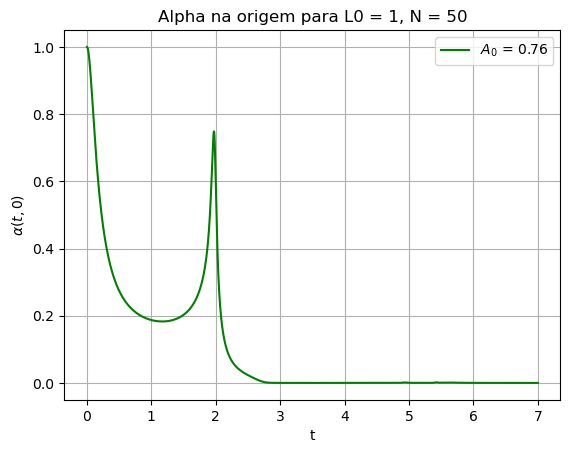

In [14]:
# Searching for critical amplitude:

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 1, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

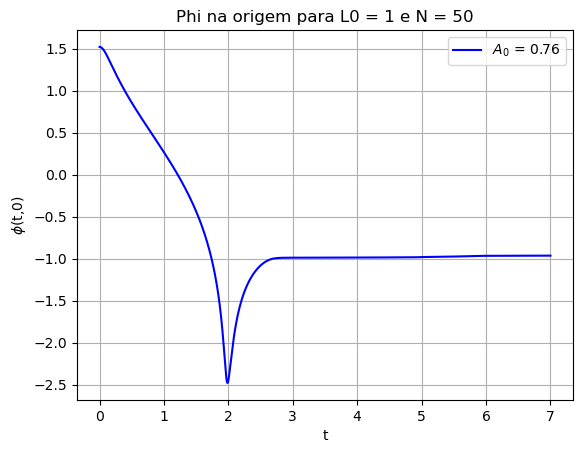

In [15]:
plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 1 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 

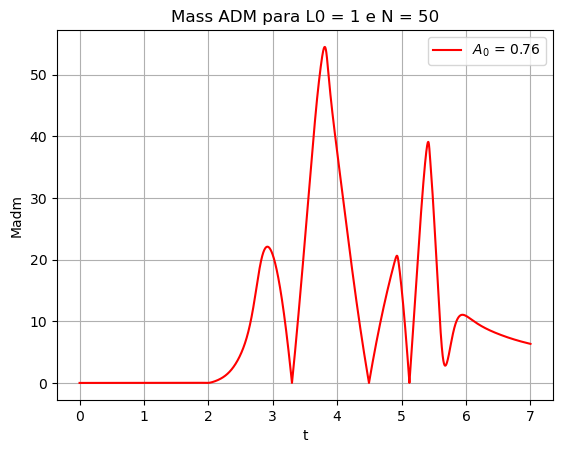

In [16]:
# Mass ADM error

Madm_error = abs(Madm - M0)/M0

plt.plot(t1, Madm_error, color = "r", label = "$A_0$ = {:}".format(A0))
plt.title("Mass ADM para L0 = 1 e N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 

NameError: name 'fig' is not defined

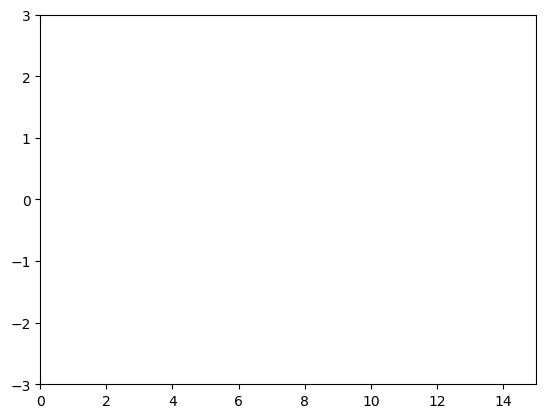

In [17]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-3, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

HTML(anim.to_html5_video())